# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
#importing all the necessary lib
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
#import matplotlib
#matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import datetime
from tqdm import tqdm
import sqlite3 as sq
from sqlalchemy import create_engine
from collections import defaultdict
import pickle
import csv
from sklearn.preprocessing import StandardScaler 
from prettytable import PrettyTable

In [2]:
#separating byte files and asm files 

source = 'train'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move('asmFiles/'+file,destination)

<h2>3.1. Distribution of malware classes in whole data set </h2>

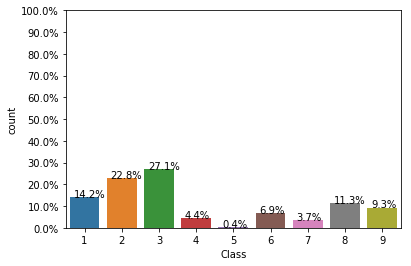

In [2]:
Y=pd.read_csv("trainLabels.csv")# loading the train labels
total = len(Y)*1.

ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [19]:
Y.columns = ['ID','Class']
Y['Class'].value_counts()

3    2942
2    2478
1    1541
8    1228
9    1013
6     751
4     475
7     398
5      42
Name: Class, dtype: int64

### Observation: Given dataset is imbalanced

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [3]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.321289      9
1  01IsoiSMh5gxyDYTl4CB  5.651855      2
2  01jsnpXSAlgw6aPeDxrU  3.967285      9
3  01kcPWA9K2BOxQeS5Rju  0.585938      1
4  01SuzwMJEIXsK7A8dQbl  0.378418      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


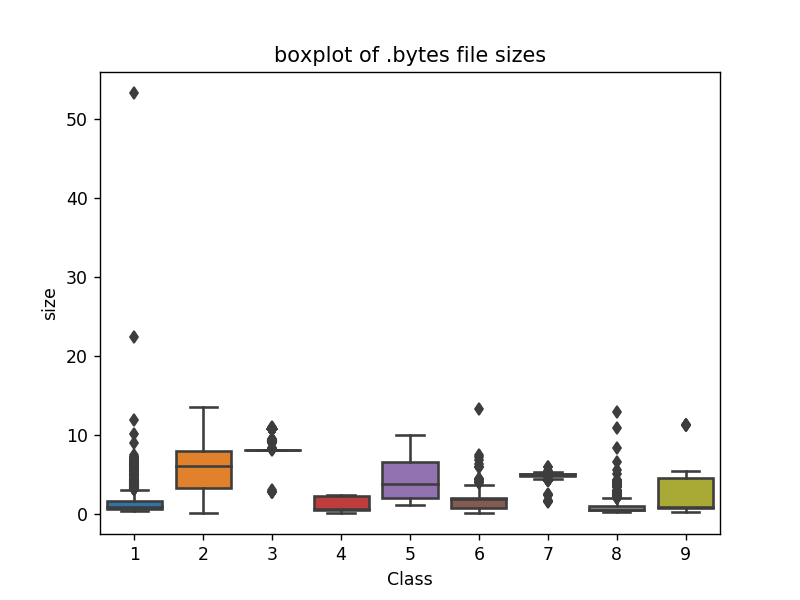

In [72]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [73]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000
start = datetime.datetime.now()
files = os.listdir('byteFiles')
filenames=[]
array=[]
for f in files:
    if(f.endswith("bytes")):
        file=f.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes" ,"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' ' + ' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()
print("Time required to run this cell:", datetime.datetime.now() - start)



Time required to run this cell: 1:14:10.898163


### UNIGRAM for BYTE FILE

In [38]:
#Obtaining the unigram corpus
ngram = 1
words_file = defaultdict(lambda: 0) # default dict to saving the unigram corpus
files = os.listdir("byteFiles/")
for file in tqdm(files):
    with open("byteFiles/"+file,"r") as byte_flie:
            for lines in byte_flie:
                split=lines.replace("\n","").split(" ")
                for ng in range(ngram-1,ngram):
                    for j in range (ng+1,len(split) ):
                        str_to_pass=""
                        for s in range (0,-ng-1,-1 ): 
                            str_to_pass+=split[j+s]
                            if str_to_pass not in words_file: # if word not present in current dictionary...add the term of the word in  worddict
                                words_file[str_to_pass]+=1
                            else:
                                words_file[str_to_pass]+=1

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [3:07:43<00:00,  4.95it/s]


In [42]:
# saving the unigram corpus

with open('unigramTrainKeys.pickle', 'wb') as handle:
    pickle.dump(list(words_file.keys()), handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('unigramTrainValues.pickle', 'wb') as handle:
    pickle.dump(list(words_file.values()), handle, protocol=pickle.HIGHEST_PROTOCOL)



In [84]:
unigra = ['ID']
with open('unigramTrainKeys.pickle','rb') as handle:
    unigra +=  pickle.load(handle)

In [103]:
#Unigram calculations
ngram = 1
byte_feature_file=open('result_byte_feat.csv','w+')
files = os.listdir("byteFiles/")
f = open('result_byte.csv', 'w')  # Just use 'w' mode in 3.x
w = csv.DictWriter(f, unigra) # creating a csv file with header of the csv file as file ID and unigram features
w.writeheader()
    #w.writerow(my_dict)
    
    
for file in tqdm(files):
    with open("byteFiles/"+file,"r") as byte_flie:
        words_file = defaultdict(lambda: 0)
        fs = file.split(".")[0]
        words_file['ID'] = fs
        for lines in byte_flie:
            split=lines.replace("\n","").split(" ")
            for ng in range(ngram-1,ngram):
                for j in range (ng+1,len(split) ):
                    str_to_pass=""
                    for s in range (0,-ng-1,-1 ): 
                        str_to_pass+=split[j+s]
                        if str_to_pass not in words_file: # if word not present in current dictionary...add the term of the word in  worddict
                            words_file[str_to_pass]+=1
                        else:
                            words_file[str_to_pass]+=1
            
    
        w.writerow(words_file)
            

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [6:22:43<00:00,  4.54it/s]


In [4]:
df_unigram_byte = pd.read_csv("result_byte.csv")
df_unigram_byte.head()

ID       E8      0B        00      E9      16      90  \
0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0  3184.0  4578.0   
1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   349.0   925.0   
2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0  2408.0  2478.0   
3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   413.0   551.0   
4  01SuzwMJEIXsK7A8dQbl    546.0   226.0   19764.0   543.0   240.0   242.0   

       B9      25      2B  ...      8F      93      6D      87      9D  \
0  3502.0  4002.0  3720.0  ...  2769.0  2700.0  3219.0  2695.0  2995.0   
1   526.0   301.0   345.0  ...   813.0   752.0   844.0   917.0   711.0   
2  2658.0  2327.0  2445.0  ...  2293.0  2688.0  2418.0  2274.0  2564.0   
3   487.0   566.0   399.0  ...   370.0   315.0   510.0   344.0   404.0   
4   296.0   486.0   472.0  ...   251.0   227.0   339.0   254.0   244.0   

       B2      DA      DF      E5       ??  
0  2997.0  3554.0  2753.0  3179.0   1824.0  
1   502.0   674.0   449.0   353.0   8588.0  
2  2547.0  2334.0  2642.0  2511.0    468.0  
3   390.0   440.0   454.0   404.0  13940.0  
4   239.0   230.0   221.0   250.0   9008.0  

[5 rows x 258 columns]

In [11]:
df_unigram_byte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10862 entries, 0 to 10861
Columns: 258 entries, ID to ??
dtypes: float64(257), object(1)
memory usage: 21.4+ MB


In [12]:
df_unigram_byte.describe()

E8            0B            00            E9             16  \
count   10853.000000  1.085100e+04  1.085300e+04  10849.000000   10853.000000   
mean     4292.678154  4.263032e+03  5.419881e+04   2960.274956    3237.459965   
std      4945.292715  2.838994e+04  1.012207e+05   3389.377291   18095.944592   
min        16.000000  1.000000e+00  6.100000e+01      1.000000       1.000000   
25%       958.000000  4.010000e+02  1.126200e+04    504.000000     313.000000   
50%      3216.000000  2.151000e+03  2.183200e+04   2204.000000     715.000000   
75%      4902.000000  3.266000e+03  6.094200e+04   3232.000000    3147.000000   
max    141825.000000  1.821532e+06  2.290304e+06  73222.000000  843056.000000   

                  90             B9            25             2B  \
count   10846.000000   10851.000000  1.085300e+04   10854.000000   
mean     2823.297437    1868.462907  2.428430e+03    2295.142344   
std      9718.301838    7227.388956  1.456668e+04   11073.885609   
min         1.000000       1.000000  4.000000e+00       1.000000   
25%       420.000000     311.000000  3.290000e+02     380.000000   
50%      1162.000000     693.000000  7.570000e+02     734.000000   
75%      3191.000000    3107.000000  3.139000e+03    3108.000000   
max    232188.000000  241908.000000  1.045149e+06  487357.000000   

                  56  ...             8F             93            6D  \
count   10854.000000  ...   10846.000000   10852.000000  1.085400e+04   
mean     3848.394509  ...    1982.542043    2105.358183  2.626638e+03   
std     17599.219681  ...    7755.624151    8195.912671  1.989782e+04   
min        25.000000  ...       1.000000       1.000000  8.000000e+00   
25%       592.000000  ...     317.000000     304.000000  4.070000e+02   
50%      2235.500000  ...     756.000000     782.000000  8.665000e+02   
75%      3338.000000  ...    3119.000000    3112.000000  3.113000e+03   
max    757670.000000  ...  215894.000000  257631.000000  1.065637e+06   

                  87             9D             B2             DA  \
count   10847.000000   10849.000000   10851.000000   10853.000000   
mean     2059.849359    2098.144622    2003.078979    1652.644338   
std      8181.993081    8507.426980    7791.107957    4568.633948   
min         1.000000       1.000000       1.000000       1.000000   
25%       321.000000     335.000000     306.000000     304.000000   
50%       786.000000     856.000000     688.000000     626.000000   
75%      3146.000000    3090.000000    3123.000000    3093.000000   
max    257868.000000  219457.000000  202568.000000  192738.000000   

                  DF             E5            ??  
count   10851.000000   10814.000000  1.080900e+04  
mean     2001.078334    1729.112817  5.013350e+05  
std      7757.692643    5982.723555  7.214560e+05  
min         1.000000       1.000000  4.000000e+00  
25%       289.500000     269.000000  8.984000e+03  
50%       647.000000     524.000000  1.738000e+04  
75%      3074.000000    3076.000000  1.490076e+06  
max    214167.000000  201021.000000  1.416540e+07  

[8 rows x 257 columns]

### Bi -Gram Calculation for the byte file

In [109]:
#Obtaining the bi-gram corpus
ngram = 2
words_file = defaultdict(lambda: 0) # default dict to store the bi gram features
files = os.listdir("byteFiles/")
for file in tqdm(files):
    with open("byteFiles/"+file,"r") as byte_flie:
            for lines in byte_flie:
                split=lines.replace("\n","").split(" ")
                for ng in range(ngram-1,ngram):
                    for j in range (ng+1,len(split) ):
                        str_to_pass=""
                        for s in range (0,-2,-1 ): 
                            str_to_pass+=split[j+s]
                        
                        if str_to_pass not in words_file: # if word not present in current dictionary...add the term of the word in  worddict
                            words_file[str_to_pass]+=1
                        else:
                            words_file[str_to_pass]+=1

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [3:20:35<00:00,  4.49it/s]


In [110]:
# saving the unigram corpus

with open('bigramTrainKeys.pickle', 'wb') as handle:
    pickle.dump(list(words_file.keys()), handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('bigramTrainValues.pickle', 'wb') as handle:
    pickle.dump(list(words_file.values()), handle, protocol=pickle.HIGHEST_PROTOCOL)



In [3]:
with open('bigramTrainValues.pickle', 'rb') as handle:
    bi_gram_values = pickle.load(handle)
with open('bigramTrainKeys.pickle', 'rb') as handle:
    bi_gram_keys = pickle.load(handle)

In [4]:
bi_gram_sorted = sorted(bi_gram_values,reverse= True) 

In [5]:
#total bigram are 65,536. To reduce the computational time and complexity, I have used top 200 bigrams based on counts
#Selecting the top 200 bi gram features based on count.
index = []
for i in bi_gram_sorted[:200]:
    index.append(bi_gram_values.index(i))


bi_gram_top_2000_list = ['ID']
for x in index:
    bi_gram_top_2000_list.append(bi_gram_keys[x])

In [7]:
print(bi_gram_top_2000_list)

['ID', '????', '0000', 'CCCC', 'FFFF', '00FF', 'FF00', '0001', 'F0F0', '8B00', '0100', '9090', '0004', '0002', '0020', '0101', '0040', '2000', '8300', '0202', '0010', '01F0', '0041', '1000', '75FF', '0003', '7400', 'E800', '0404', '1010', '2020', '0043', '0008', '458B', '0400', '8000', 'C483', '0200', '8900', '0606', '8BFF', '0303', 'FFFE', '0300', 'F2F2', 'F001', '4040', '3333', '5000', '0800', '8D00', '0074', '5959', 'E8E8', '6800', '006A', '0006', '0005', '5656', '0808', '5050', 'C085', '7474', '8D8D', '8B8B', '0F00', '4444', '0F0F', '2444', '0080', 'FEFE', '5353', '0505', '2424', '7500', '3300', '0065', '000B', '0C0C', '6A00', '0016', '0707', 'FCFC', 'FDFD', 'C0C0', '000C', '8080', '8500', 'F8F8', '4000', '83FF', '15FF', '4D8B', '5757', '8585', '0B0B', '1818', '0044', '8383', 'FF8B', 'F1F1', '5900', '3939', '4343', '0007', '1600', 'C033', '0600', '6868', '7575', '6A6A', '0030', '1200', '8888', '0500', '3B3B', 'ECEC', '3000', 'C000', 'C7C7', '0045', '5600', '4545', 'C3C3', '1414', '

##### Top 200 bigrams that are selected 

In [9]:
#bigram calculations
ngram = 2

files = os.listdir("byteFiles/")
f = open('result_byte_bigram.csv', 'w')  # Just use 'w' mode in 3.x
w = csv.DictWriter(f, bi_gram_top_2000_list)
w.writeheader()
    #w.writerow(my_dict)
    
for file in tqdm(files):
    with open("byteFiles/"+file,"r") as byte_flie:
        words_file = dict.fromkeys(list(bi_gram_top_2000_list), 0)
        fs = file.split(".")[0]
        words_file['ID'] = fs
        for lines in byte_flie:
            split=lines.replace("\n","").split(" ")
            for ng in range(1,ngram):
                for j in range (3,len(split) ):
                    str_to_pass=""
                    for s in range (0,-2,-1 ): 
                        str_to_pass+=split[j+s]
                    if str_to_pass in bi_gram_top_2000_list: # if word not present in current dictionary...add the term of the word in  worddict
                        words_file[str_to_pass]+=1
                        
                    else:
                        pass
            
    
        

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [7:14:39<00:00,  2.40it/s]


In [5]:
df_bigram_byte = pd.read_csv("result_byte_bigram.csv")
df_bigram_byte.head()

ID   ????    0000  CCCC  FFFF  00FF  FF00  0001  F0F0  \
0  01azqd4InC7m9JpocGv5   1593  271912    98   779  1498  1542  1778    84   
1  01IsoiSMh5gxyDYTl4CB   7510   18639   732  4234  2007   862   730    21   
2  01jsnpXSAlgw6aPeDxrU    402   14131     7  1826  2240  2283   433     3   
3  01kcPWA9K2BOxQeS5Rju  12194    9170    22  1082   628   637   157    11   
4  01SuzwMJEIXsK7A8dQbl   7880   14283    31    71    22    52   225     1   

   8B00  ...  0063  1212  0053  0085  5F00  008D  5500  00C7  E900  EC8B  
0  1777  ...  1132    84  1268  1444  1067  1240   873  1528   922     3  
1   282  ...    16     1     7     4    29     9    10    32    32   130  
2  1047  ...   138     3    98   713   187   446   172   125   134    59  
3   304  ...    63     1    71    42    30    84   110    30    22    32  
4   362  ...     8     1     2     2    23    18     8     0     7    21  

[5 rows x 201 columns]

In [4]:
df_bigram_byte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Columns: 201 entries, ID to EC8B
dtypes: int64(200), object(1)
memory usage: 16.7+ MB


In [8]:
df_bigram_byte.describe()


????          0000           CCCC           FFFF          00FF  \
count  1.086400e+04  1.086400e+04   10864.000000   10864.000000  10864.000000   
mean   4.364992e+05  2.428387e+04    9169.319219    2763.858432    743.194035   
std    6.304190e+05  4.899751e+04   43712.764899    9276.251070   1366.024183   
min    0.000000e+00  0.000000e+00       0.000000       0.000000      0.000000   
25%    7.774250e+03  5.447750e+03      12.000000      86.000000    103.000000   
50%    1.512100e+04  1.422700e+04      31.000000     654.000000    280.000000   
75%    1.303815e+06  2.399775e+04     318.000000    3269.000000    684.500000   
max    1.239472e+07  2.000608e+06  596902.000000  630396.000000  30182.000000   

               FF00          0001          F0F0          8B00          0100  \
count  10864.000000  10864.000000  10864.000000  10864.000000  10864.000000   
mean     752.565538    601.162739    441.721189    425.676638    368.477080   
std     1612.480995   1012.066648   1159.301749    867.217380    739.766028   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       53.750000     95.000000      1.000000     49.000000     35.000000   
50%      191.000000    224.000000      8.000000    190.000000    118.000000   
75%      840.000000    804.000000    312.000000    508.250000    541.250000   
max    84185.000000  15786.000000  14520.000000  22323.000000  12518.000000   

       ...          0063           1212          0053          0085  \
count  ...  10864.000000   10864.000000  10864.000000  10864.000000   
mean   ...    115.530652     117.208855    116.859536    117.335420   
std    ...    468.620671    2390.623489    504.337211    420.225695   
min    ...      0.000000       0.000000      0.000000      0.000000   
25%    ...     12.000000       0.000000      8.000000      7.000000   
50%    ...     43.000000       5.000000     17.000000     14.000000   
75%    ...    119.000000      11.000000     63.000000     56.000000   
max    ...  34940.000000  129932.000000  24257.000000   9312.000000   

                5F00          008D          5500          00C7          E900  \
count   10864.000000  10864.000000  10864.000000  10864.000000  10864.000000   
mean      114.625460    117.045747    114.125736    116.938513    112.781296   
std      1639.855214    440.234226    431.161154    412.505762    404.069043   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%        13.000000      9.000000     12.000000      7.000000      8.000000   
50%        23.000000     17.000000     25.000000     16.000000     16.000000   
75%        57.000000     66.000000     61.000000     97.000000     88.000000   
max    113498.000000   9644.000000  13547.000000  11627.000000  12421.000000   

               EC8B  
count  10864.000000  
mean     114.495858  
std      253.618545  
min        0.000000  
25%       19.000000  
50%       51.000000  
75%      131.000000  
max     5349.000000  

[8 rows x 200 columns]

### N- Gram calculation for the byte file (N = 3)

In [2]:
#Obtaining the N-gram corpus for N = 3
ngram = 3
words_file = defaultdict(lambda: 0)
files = os.listdir("byteFiles/")
for file in tqdm(files):
    with open("byteFiles/"+file,"r") as byte_flie:
            for lines in byte_flie:
                split=lines.replace("\n","").split(" ")
                for ng in range(ngram-1,ngram):
                    for j in range (ng+1,len(split) ):
                        str_to_pass=""
                        for s in range (0,-ng-1,-1 ): 
                            str_to_pass+=split[j+s]
                        
                        if str_to_pass not in words_file: # if word not present in current dictionary...add the term of the word in  worddict
                            words_file[str_to_pass]+=1
                        else:
                            words_file[str_to_pass]+=1

100%|██████████████████████████████████████████████████████████████████████████| 10868/10868 [7:06:50<00:00,  3.52it/s]


In [3]:
# saving the unigram corpus

with open('ngramTrainKeys.pickle', 'wb') as handle:
    pickle.dump(list(words_file.keys()), handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('ngramTrainValues.pickle', 'wb') as handle:
    pickle.dump(list(words_file.values()), handle, protocol=pickle.HIGHEST_PROTOCOL)



In [3]:
with open('ngramTrainValues.pickle', 'rb') as handle:
    n_gram_values = pickle.load(handle)
with open('ngramTrainKeys.pickle', 'rb') as handle:
    n_gram_keys = pickle.load(handle)

In [4]:
n_gram_sorted = sorted(n_gram_values,reverse= True) 

In [5]:
#Selecting top 200 N grams based on counts to reduce computation complexity
index = []
for i in n_gram_sorted[:200]:
    index.append(n_gram_values.index(i))


n_gram_top_2000_list = ['ID']
for x in index:
    n_gram_top_2000_list.append(n_gram_keys[x])

In [6]:
print(n_gram_top_2000_list)

['ID', '??????', '000000', 'CCCCCC', 'FFFFFF', '000001', '0000FF', '909090', '000100', '00FFFF', '8B0000', '002000', 'FFFF00', 'FF0000', '01F0F0', '010000', '00FF00', 'FF00FF', '000004', 'F0F0F0', '000002', '830000', 'FFFFFE', 'F0F001', 'F001F0', '000010', 'EC8B55', '000003', '8BFFFF', '001000', '83FFFF', '000020', '800000', '890000', '000400', '010101', '00000B', '55FF8B', '8B55FF', 'E80000', '030000', '007400', '000080', 'FFFFFD', 'C483FF', '000200', '001600', '000016', '74C085', '006500', '000008', '000005', '040000', '000040', '000300', '200000', '008000', '000800', 'C48300', '590000', '006900', '007200', '8D0000', '0F0000', '740000', '24448B', '080000', '100000', '000007', '120000', '500000', '007300', '59FFFF', '08458B', 'F00000', '000006', '00000D', '006100', '003000', '00000A', 'EB0000', '000028', '000500', '000009', '330000', '400000', '006A00', '680000', '006800', '004000', '020000', '020202', 'C70000', '160000', '00000C', '00000F', '06FA06', '000065', '040404', '000041', '00

In [8]:
#Unigram calculations
ngram = 3

files = os.listdir("byteFiles/")
f = open('result_byte_ngram.csv', 'w')  # Just use 'w' mode in 3.x
w = csv.DictWriter(f, n_gram_top_2000_list)
w.writeheader()
    #w.writerow(my_dict)
    
for file in tqdm(files):
    with open("byteFiles/"+file,"r") as byte_flie:
        words_file = dict.fromkeys(list(n_gram_top_2000_list), 0)
        fs = file.split(".")[0]
        words_file['ID'] = fs
        for lines in byte_flie:
            split=lines.replace("\n","").split(" ")
            for ng in range(1,ngram):
                for j in range (3,len(split) ):
                    str_to_pass=""
                    for s in range (0,-3,-1 ): 
                        str_to_pass+=split[j+s]
                    if str_to_pass in n_gram_top_2000_list: # if word not present in current dictionary...add the term of the word in  worddict
                        words_file[str_to_pass]+=1
                                               
                    else:
                        pass
            
    
        w.writerow(words_file)

100%|█████████████████████████████████████████████████████████████████████████| 10868/10868 [17:41:16<00:00,  1.14it/s]


In [6]:
df_ngram_byte = pd.read_csv("result_byte_ngram.csv")
df_ngram_byte.head()

ID  ??????  000000  CCCCCC  FFFFFF  000001  0000FF  \
0  01azqd4InC7m9JpocGv5    3180   29808      18      76    2142    2684   
1  01IsoiSMh5gxyDYTl4CB   15012   29658    1254    3388     398    1022   
2  01jsnpXSAlgw6aPeDxrU     792   19336       4     236      98      58   
3  01kcPWA9K2BOxQeS5Rju   24384   12728      30     428     152     208   
4  01SuzwMJEIXsK7A8dQbl   15752   26806      50      28     110      40   

   909090  000100  00FFFF  ...  040004  00006E  00F000  000030  048004  \
0    2622      32      22  ...       0    1916      28    2018       0   
1       0    1188     732  ...       0      26       0      14       0   
2       0      16      34  ...       4      38       2      36       2   
3       0     172     218  ...       2     112      10      26       0   
4       0      76      12  ...       0       6       4      10       0   

   044604  008B00  008800  008D00  000064  
0       0      30      12      18    2000  
1       0      14       0       2      16  
2       2      22       4       8      26  
3       0      72      10      28     108  
4       0       2       0       0       8  

[5 rows x 201 columns]

In [7]:
#Merging the unigram and bigram features
result_byte = pd.merge(df_unigram_byte, df_bigram_byte,on='ID', how='left')
result_byte.head()

ID       E8      0B        00      E9      16      90  \
0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0  3184.0  4578.0   
1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   349.0   925.0   
2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0  2408.0  2478.0   
3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   413.0   551.0   
4  01SuzwMJEIXsK7A8dQbl    546.0   226.0   19764.0   543.0   240.0   242.0   

       B9      25      2B  ...  0063  1212  0053  0085  5F00  008D  5500  \
0  3502.0  4002.0  3720.0  ...  1132    84  1268  1444  1067  1240   873   
1   526.0   301.0   345.0  ...    16     1     7     4    29     9    10   
2  2658.0  2327.0  2445.0  ...   138     3    98   713   187   446   172   
3   487.0   566.0   399.0  ...    63     1    71    42    30    84   110   
4   296.0   486.0   472.0  ...     8     1     2     2    23    18     8   

   00C7  E900  EC8B  
0  1528   922     3  
1    32    32   130  
2   125   134    59  
3    30    22    32  
4     0     7    21  

[5 rows x 458 columns]

In [8]:
#Merging the Ngram feature with unigram and bigram features of byte file
result_byte_ = pd.merge(result_byte,df_ngram_byte,on = 'ID',how='left')

In [9]:
#Merging size of byte file feature to unigram,bigram and Ngram 
result_byte_final = pd.merge(result_byte_,data_size_byte,on='ID',how='left')
result_byte_final.head()

ID       E8      0B        00      E9      16      90  \
0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0  3184.0  4578.0   
1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   349.0   925.0   
2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0  2408.0  2478.0   
3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   413.0   551.0   
4  01SuzwMJEIXsK7A8dQbl    546.0   226.0   19764.0   543.0   240.0   242.0   

       B9      25      2B  ...  00F000  000030  048004  044604  008B00  \
0  3502.0  4002.0  3720.0  ...    28.0  2018.0     0.0     0.0    30.0   
1   526.0   301.0   345.0  ...     0.0    14.0     0.0     0.0    14.0   
2  2658.0  2327.0  2445.0  ...     2.0    36.0     2.0     2.0    22.0   
3   487.0   566.0   399.0  ...    10.0    26.0     0.0     0.0    72.0   
4   296.0   486.0   472.0  ...     4.0    10.0     0.0     0.0     2.0   

   008800  008D00  000064      size  Class  
0    12.0    18.0  2000.0  4.321289      9  
1     0.0     2.0    16.0  5.651855      2  
2     4.0     8.0    26.0  3.967285      9  
3    10.0    28.0   108.0  0.585938      1  
4     0.0     0.0     8.0  0.378418      8  

[5 rows x 660 columns]

In [10]:
result_byte_final.to_csv('result_byte_final.csv') # saving the features of byte file to a csv file

In [49]:
result_byte_final = pd.read_csv('result_byte_final.csv') # reading the csv file having all the features of byte file.
result_byte_final.head(4)

Unnamed: 0                    ID       E8      0B        00      E9  \
0           0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0   
1           1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   
2           2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0   
3           3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   

       16      90      B9      25  ...  00F000  000030  048004  044604  \
0  3184.0  4578.0  3502.0  4002.0  ...    28.0  2018.0     0.0     0.0   
1   349.0   925.0   526.0   301.0  ...     0.0    14.0     0.0     0.0   
2  2408.0  2478.0  2658.0  2327.0  ...     2.0    36.0     2.0     2.0   
3   413.0   551.0   487.0   566.0  ...    10.0    26.0     0.0     0.0   

   008B00  008800  008D00  000064      size  Class  
0    30.0    12.0    18.0  2000.0  4.321289      9  
1    14.0     0.0     2.0    16.0  5.651855      2  
2    22.0     4.0     8.0    26.0  3.967285      9  
3    72.0    10.0    28.0   108.0  0.585938      1  

[4 rows x 661 columns]

In [50]:
# https://stackoverflow.com/a/29651514
#Performing normalizing 
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


In [51]:
result_byte_final_normalized = normalize(result_byte_final)
result_byte_final_normalized.head()

Unnamed: 0                    ID        E8        0B        00        E9  \
0    0.000000  01azqd4InC7m9JpocGv5  0.033101  0.001946  0.262786  0.041423   
1    0.000092  01IsoiSMh5gxyDYTl4CB  0.052818  0.003650  0.017332  0.093921   
2    0.000184  01jsnpXSAlgw6aPeDxrU  0.157169  0.001465  0.040801  0.034321   
3    0.000276  01kcPWA9K2BOxQeS5Rju  0.020330  0.000244  0.009182  0.009792   
4    0.000368  01SuzwMJEIXsK7A8dQbl  0.003737  0.000124  0.008603  0.007402   

         16        90        B9        25  ...    00F000    000030    048004  \
0  0.003776  0.019713  0.014473  0.003825  ...  0.001239  0.656047  0.000000   
1  0.000413  0.003980  0.002170  0.000284  ...  0.000000  0.004551  0.000000   
2  0.002855  0.010668  0.010984  0.002223  ...  0.000088  0.011704  0.000081   
3  0.000489  0.002369  0.002009  0.000538  ...  0.000442  0.008453  0.000000   
4  0.000283  0.001038  0.001219  0.000461  ...  0.000177  0.003251  0.000000   

     044604    008B00    008800    008D00    000064      size  Class  
0  0.000000  0.001616  0.000649  0.000940  0.646831  0.092219      9  
1  0.000000  0.000754  0.000000  0.000104  0.005175  0.121236      2  
2  0.000074  0.001185  0.000216  0.000418  0.008409  0.084499      9  
3  0.000000  0.003878  0.000541  0.001463  0.034929  0.010759      1  
4  0.000000  0.000108  0.000000  0.000000  0.002587  0.006233      8  

[5 rows x 661 columns]

In [52]:

result_byte_final_normalized.shape

(10862, 661)

 ## Total number of features of byte are 661( 256 unigram features + 200 bigram features + 200 N-gram features + size + ID + class)

In [53]:
# Checking for any NaN values in the byte feature and removing them
result_byte_final_normalized.dropna(how = 'any')
result_byte_final_normalized.shape

(10862, 661)

In [60]:
#checking for infinite values which might have resulted due to divide by zero and removing them,
result_byte_final_normalized.replace([np.inf, -np.inf], np.nan)
result_byte_final_normalized.dropna(inplace=True,how='any')
result_byte_final_normalized.drop(['Unnamed: 0','ID'],axis = 1,inplace=True)
data_y = result_byte_final_normalized['Class']
result_byte_final_normalized.shape

(10603, 659)

<h3>3.2.4 Multivariate Analysis </h3>

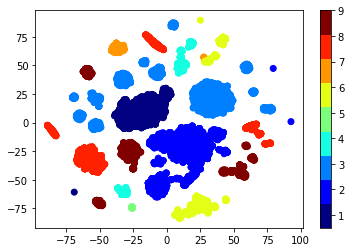

In [61]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_byte_final_normalized)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

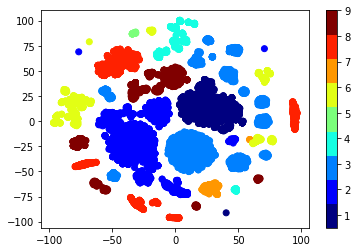

In [62]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_byte_final_normalized)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [63]:

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result_byte_final_normalized, data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [64]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6785
Number of data points in test data: 2121
Number of data points in cross validation data: 1697


In [65]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1> Machine Learning Models</h1>

<h2> Machine Leaning Models on bytes files</h2>

<h3> Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.5067846839858796
Log loss on Test Data using Random Model 2.5103159028550284
Number of misclassified points  88.4016973125884
-------------------------------------------------- Confusion matrix --------------------------------------------------


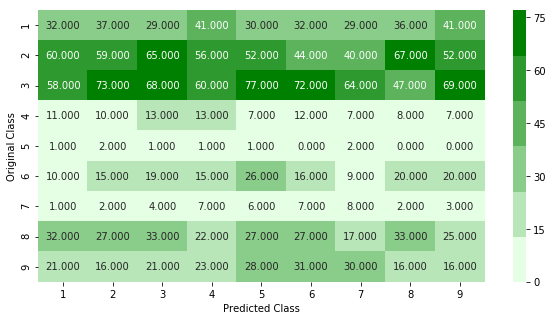

-------------------------------------------------- Precision matrix --------------------------------------------------


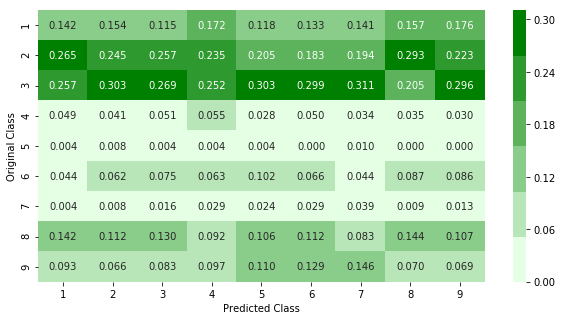

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


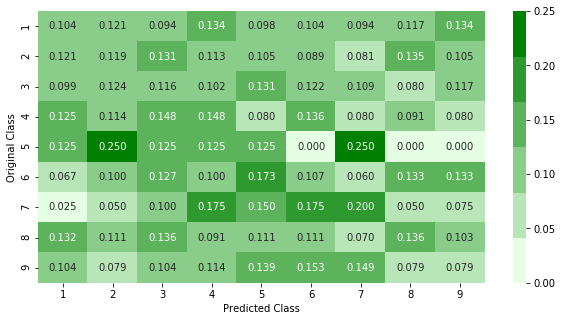

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [66]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.004510868853506051
log_loss for k =  3 is 0.004557205040696172
log_loss for k =  5 is 0.005029519145523039
log_loss for k =  7 is 0.00510030238641321
log_loss for k =  9 is 0.0048316063472091915
log_loss for k =  11 is 0.004846343957120577
log_loss for k =  13 is 0.004996232337912015


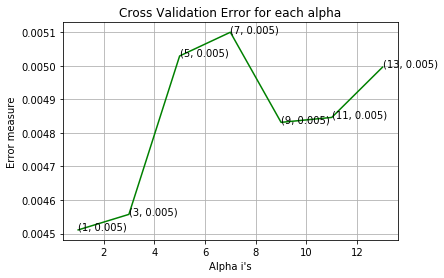

For values of best alpha =  1 The train log loss is: 0.004391601973061422
For values of best alpha =  1 The cross validation log loss is: 0.004510868853506051
For values of best alpha =  1 The test log loss is: 0.004462983555005302
Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


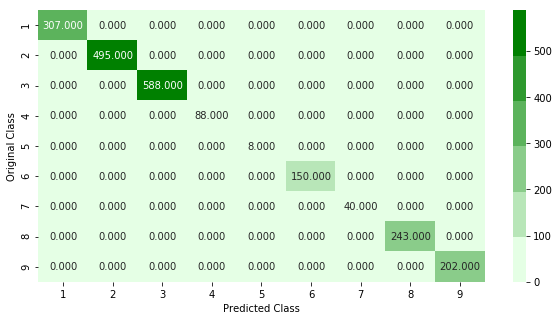

-------------------------------------------------- Precision matrix --------------------------------------------------


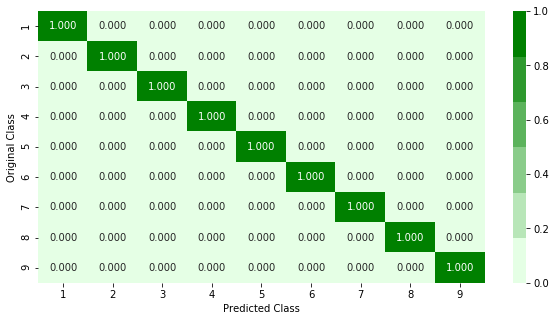

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


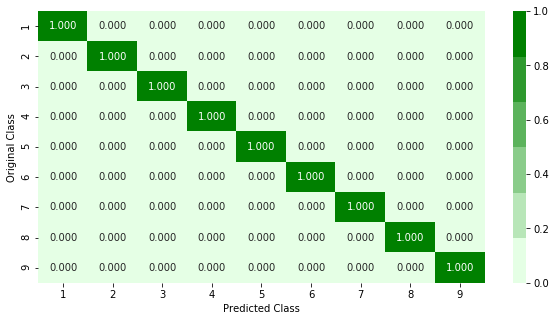

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [67]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    loss = log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print ('log_loss for k = ',i,'is',loss)
    
#for i in range(len(cv_log_error_array)):
 #   print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha],n_jobs=-1)
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 0.9215344825234812
log_loss for c =  0.0001 is 0.9105346545113124
log_loss for c =  0.001 is 1.0744964466237623
log_loss for c =  0.01 is 0.4136552678651763
log_loss for c =  0.1 is 0.2256356395708307
log_loss for c =  1 is 0.12328536788837237
log_loss for c =  10 is 0.08384659910202807
log_loss for c =  100 is 0.06747625152846469
log_loss for c =  1000 is 0.06755068869401172


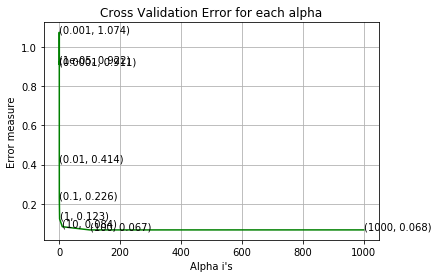

log loss for train data 0.050462791600278174
log loss for cv data 0.06747625152846469
log loss for test data 0.07175374354140873
Number of misclassified points  1.0372465818010372
-------------------------------------------------- Confusion matrix --------------------------------------------------


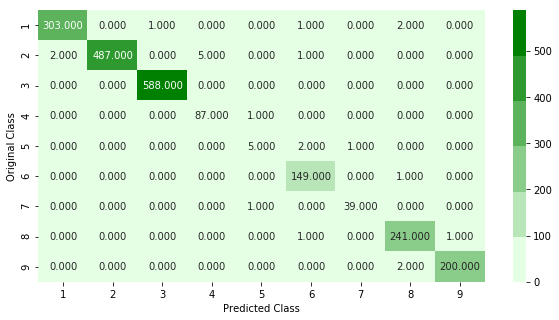

-------------------------------------------------- Precision matrix --------------------------------------------------


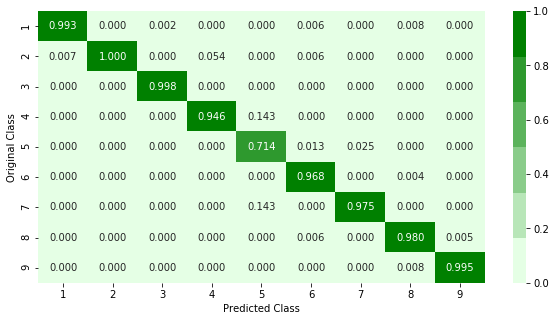

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


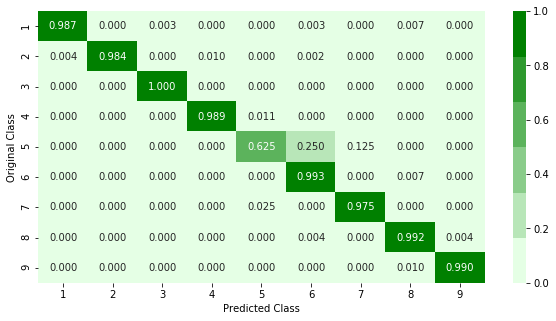

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [68]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    loss = log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print ('log_loss for c = ',i,'is',loss)
    

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.0332305642935828
log_loss for c =  50 is 0.02874030435462668
log_loss for c =  100 is 0.029838486911465022
log_loss for c =  500 is 0.030519994616390874
log_loss for c =  1000 is 0.031021455633208753
log_loss for c =  2000 is 0.03116218703454003
log_loss for c =  3000 is 0.0314427835577681


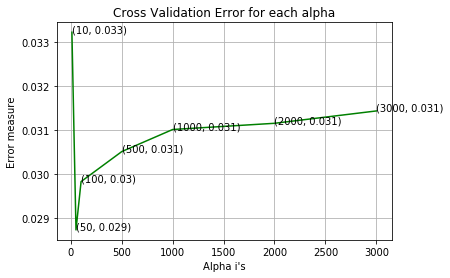

For values of best alpha =  50 The train log loss is: 0.012601767552901405
For values of best alpha =  50 The cross validation log loss is: 0.02874030435462668
For values of best alpha =  50 The test log loss is: 0.02831793282885231
Number of misclassified points  0.6129184347006129
-------------------------------------------------- Confusion matrix --------------------------------------------------


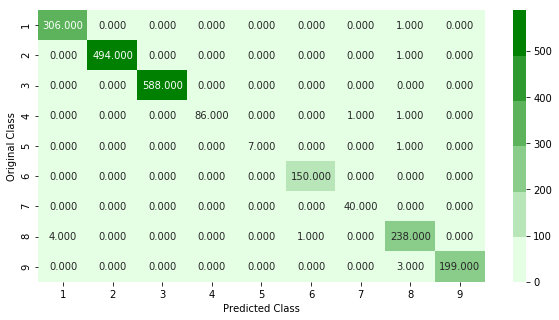

-------------------------------------------------- Precision matrix --------------------------------------------------


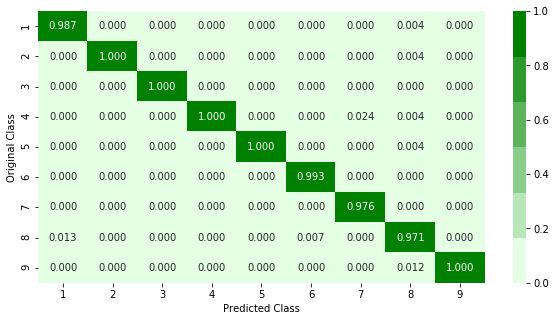

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


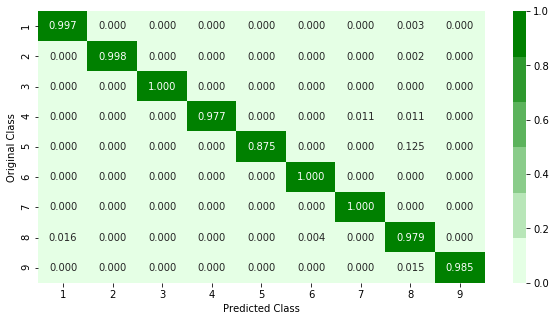

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [69]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    loss = log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print ('log_loss for c = ',i,'is',loss)


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show(block=False)
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [70]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:  5.0min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  6.5min remaining:  6.5min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  9.1min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 10.6min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 11.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.7min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [71]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [72]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=random_cfl.best_params_['n_estimators'],max_depth=random_cfl.best_params_['max_depth'],
                    learning_rate=random_cfl.best_params_['learning_rate'],colsample_bytree=random_cfl.best_params_['colsample_bytree'],
                    subsample=random_cfl.best_params_['subsample'],n_jobs=-1)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.0048845653372152405
cv loss 0.006449748921470773
test loss 0.008751829364442121


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [ ]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [6]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [25]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


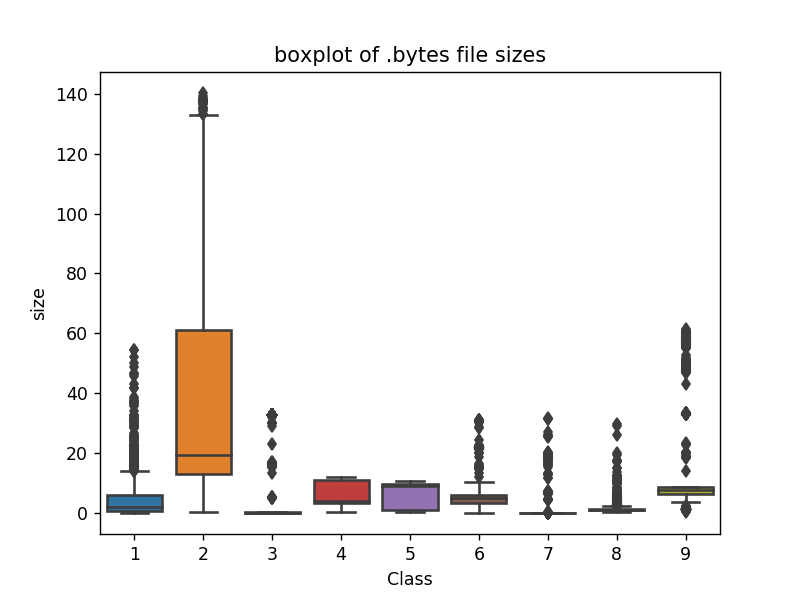

In [26]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [27]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [28]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


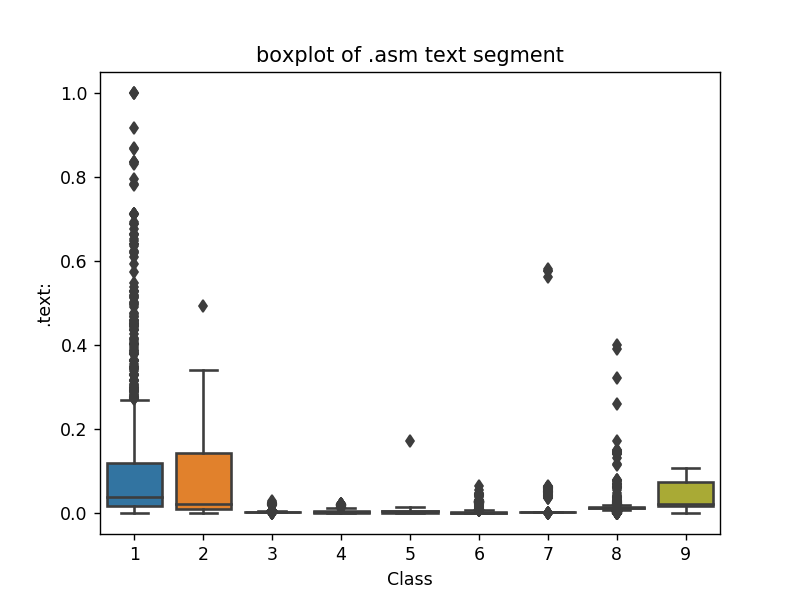

In [146]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


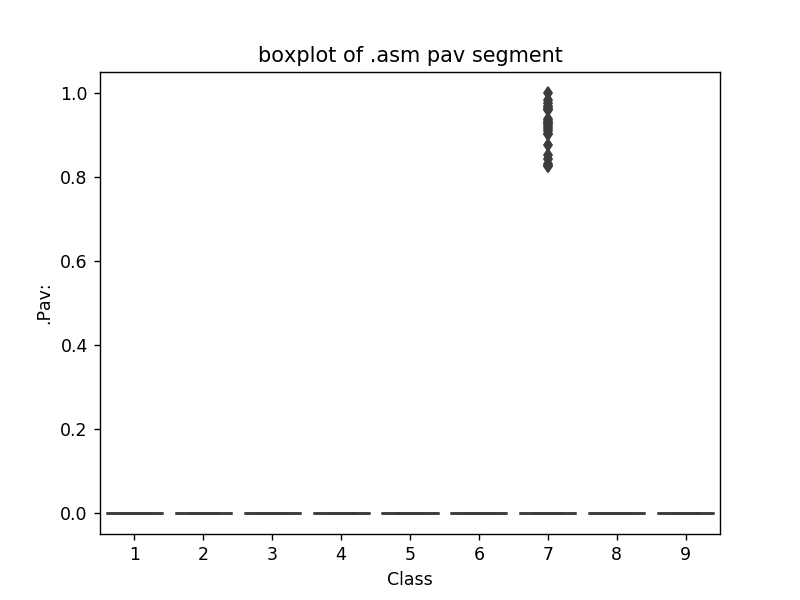

In [115]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


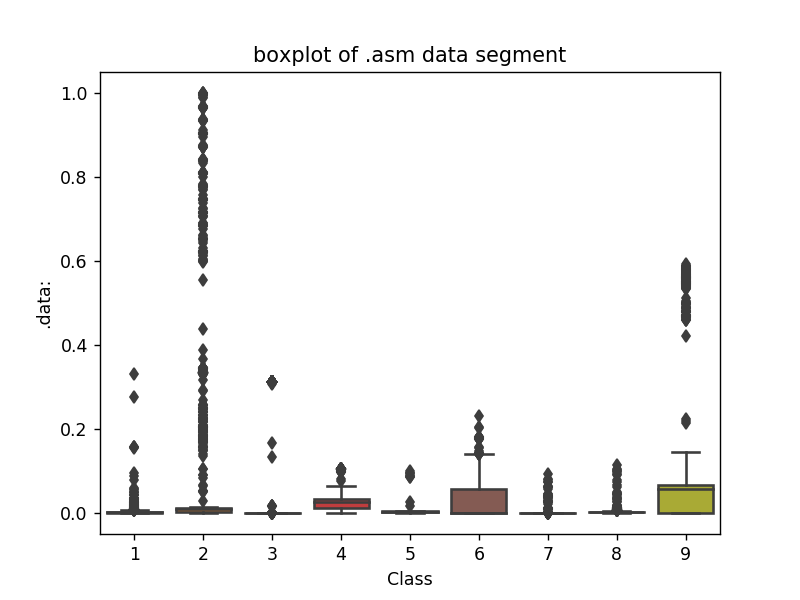

In [116]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


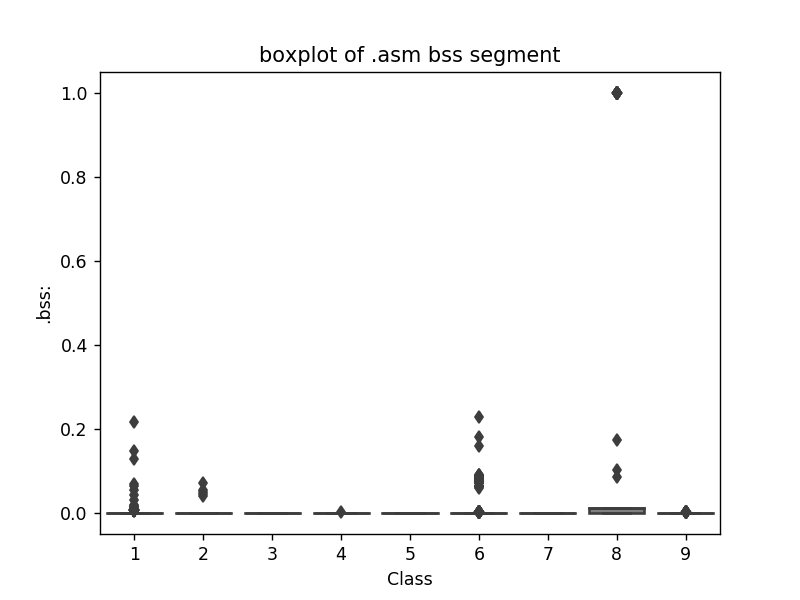

In [117]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


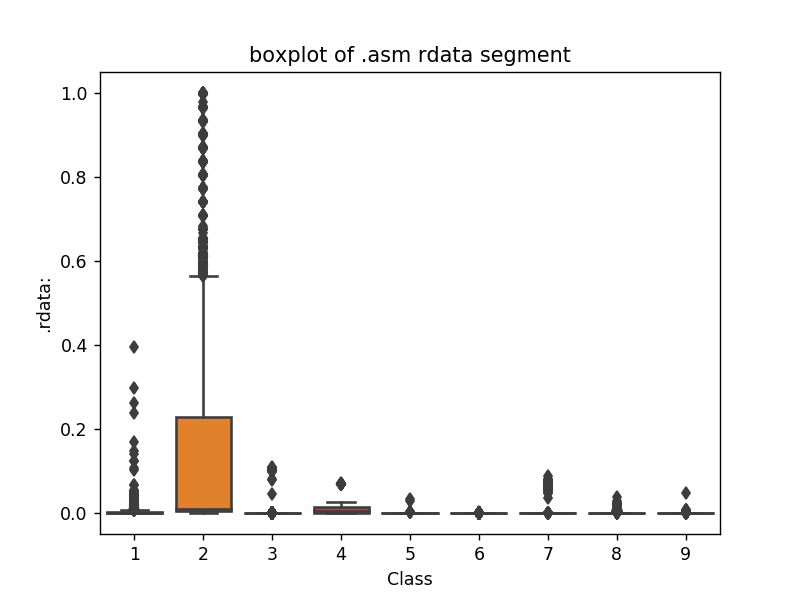

In [118]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


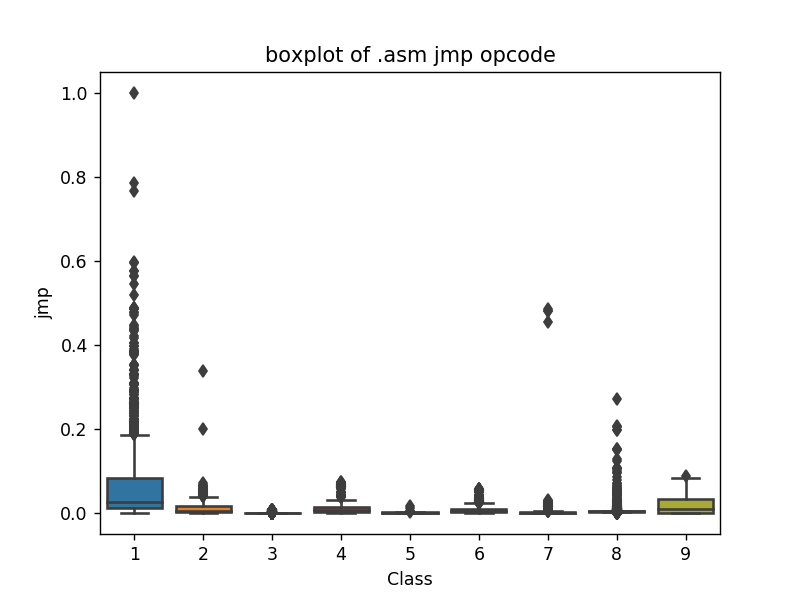

In [119]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


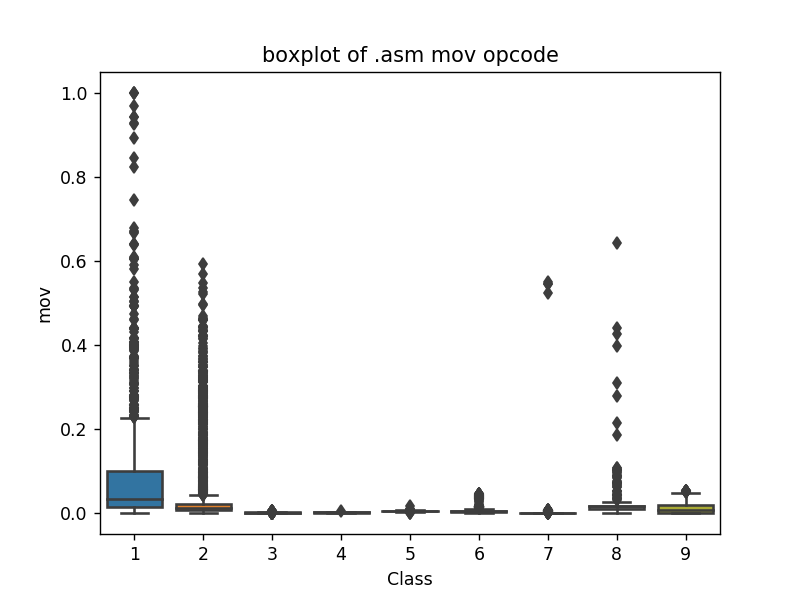

In [120]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


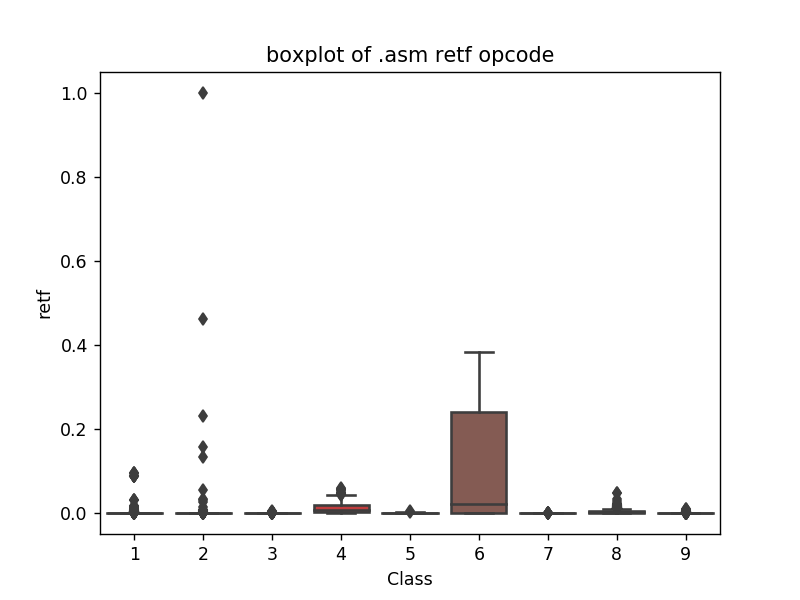

In [121]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


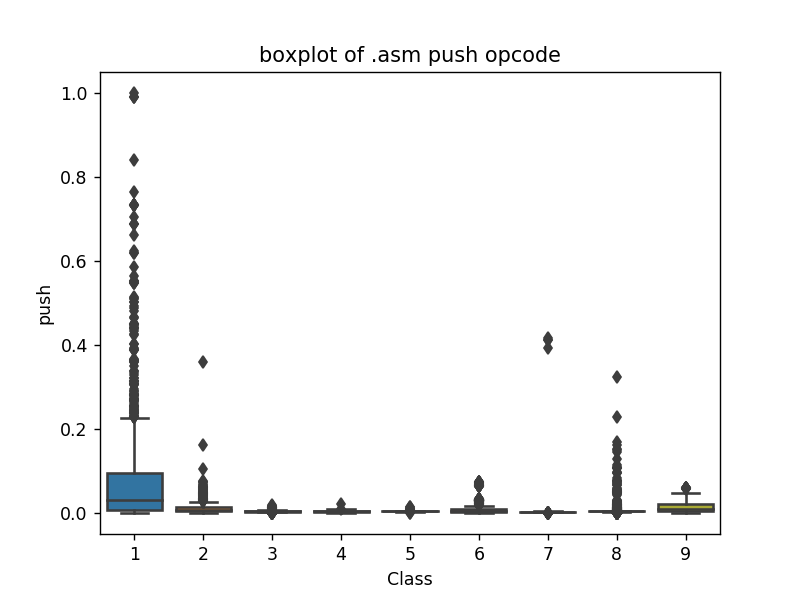

In [122]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


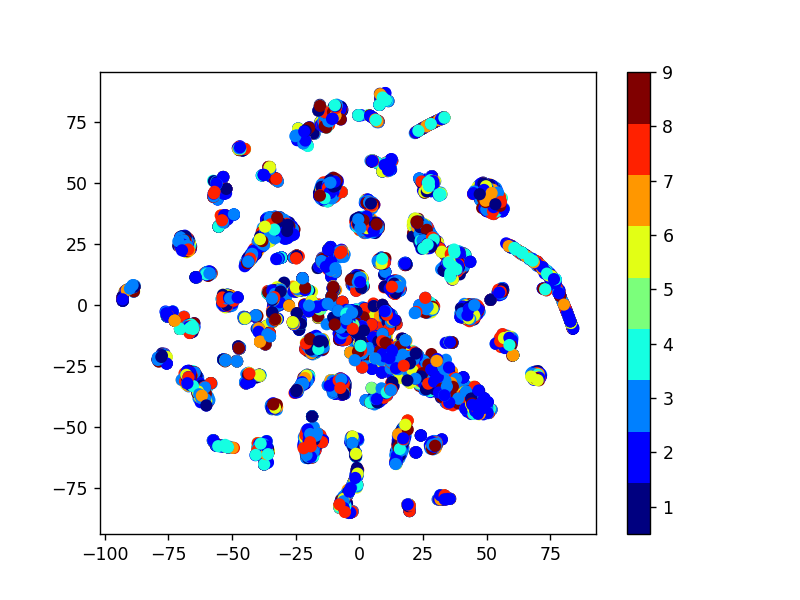

In [129]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


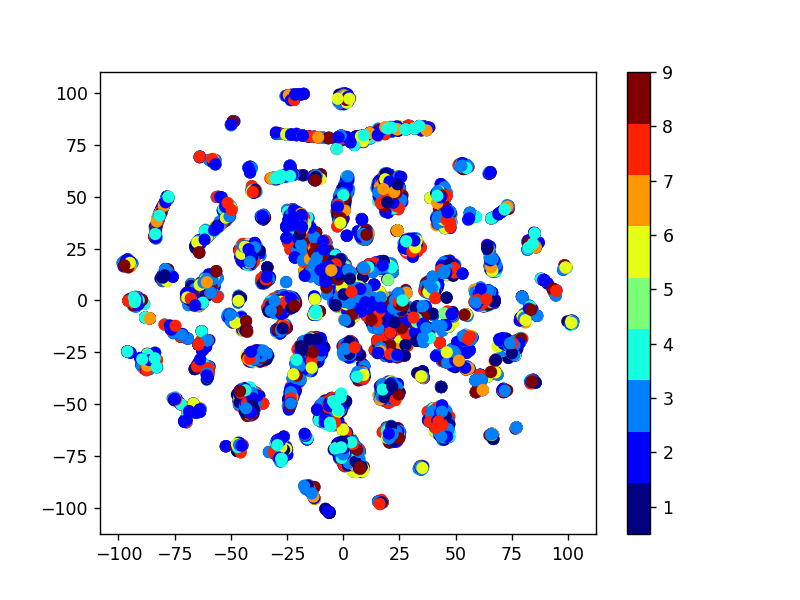

In [147]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [29]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [30]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [31]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.104531321344
log_loss for k =  3 is 0.0958800580948
log_loss for k =  5 is 0.0995466557335
log_loss for k =  7 is 0.107227274345
log_loss for k =  9 is 0.119239543547
log_loss for k =  11 is 0.133926642781
log_loss for k =  13 is 0.147643793967
log_loss for k =  15 is 0.159439699615
log_loss for k =  17 is 0.16878376444
log_loss for k =  19 is 0.178020728839


<IPython.core.display.Javascript object>


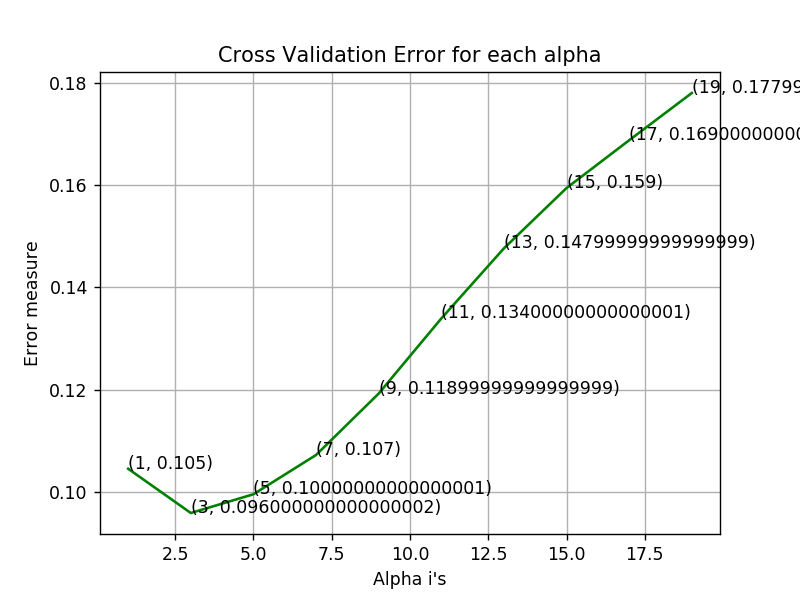

log loss for train data 0.0476773462198
log loss for cv data 0.0958800580948
log loss for test data 0.0894810720832
Number of misclassified points  2.02391904324
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


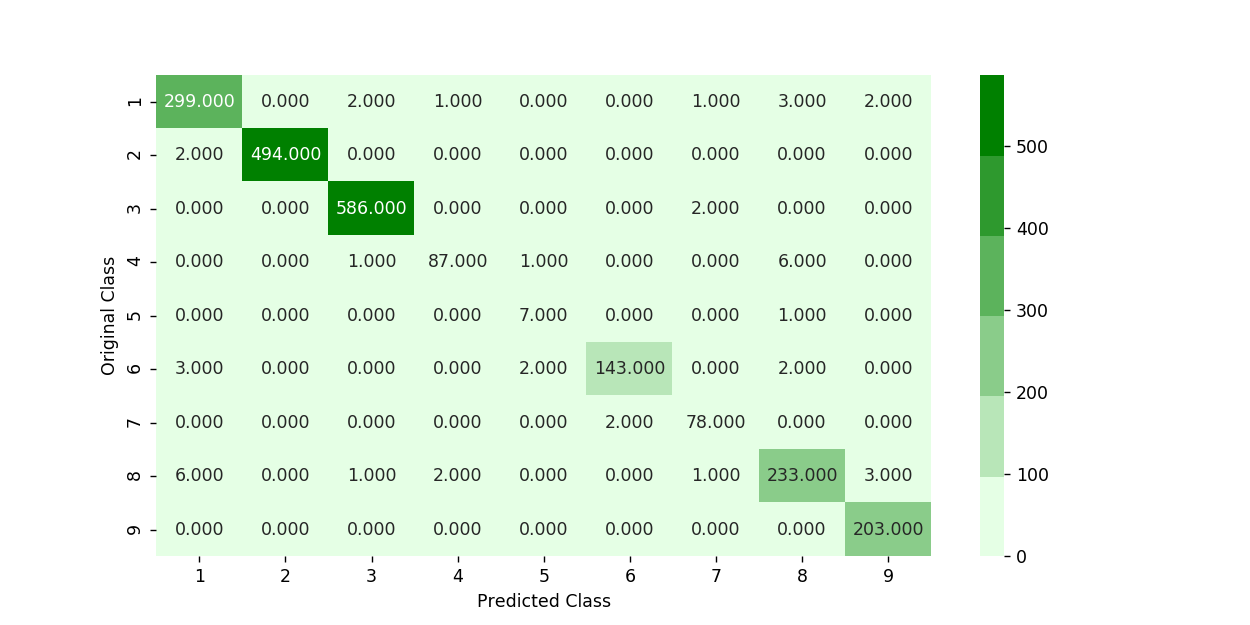

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


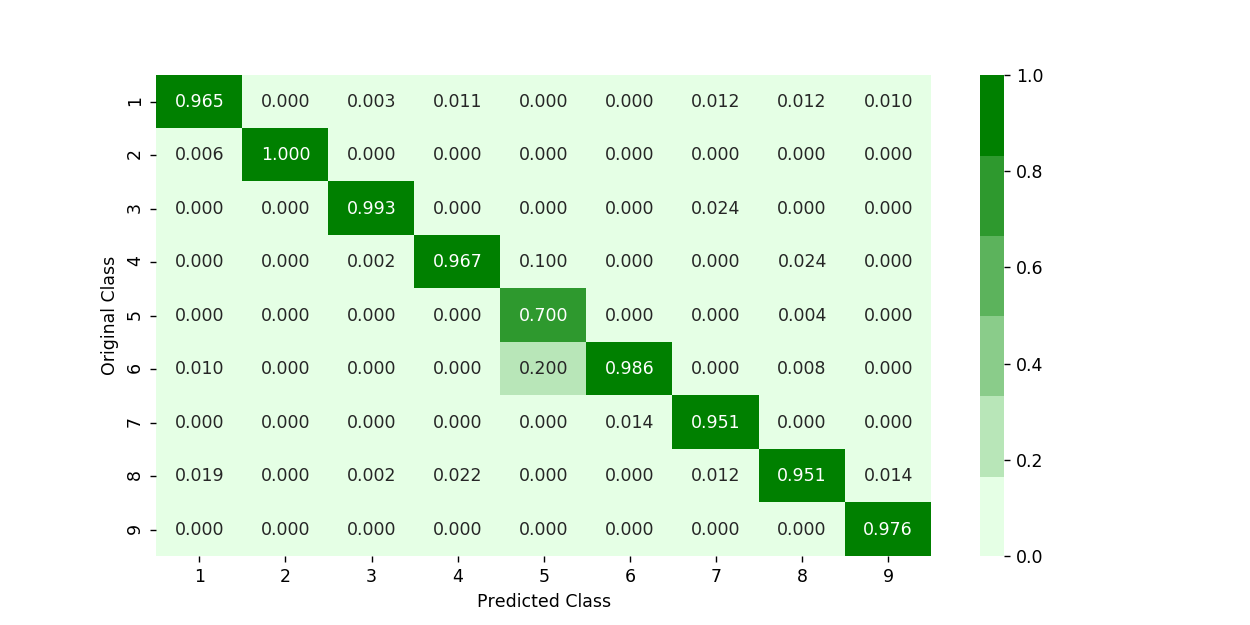

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


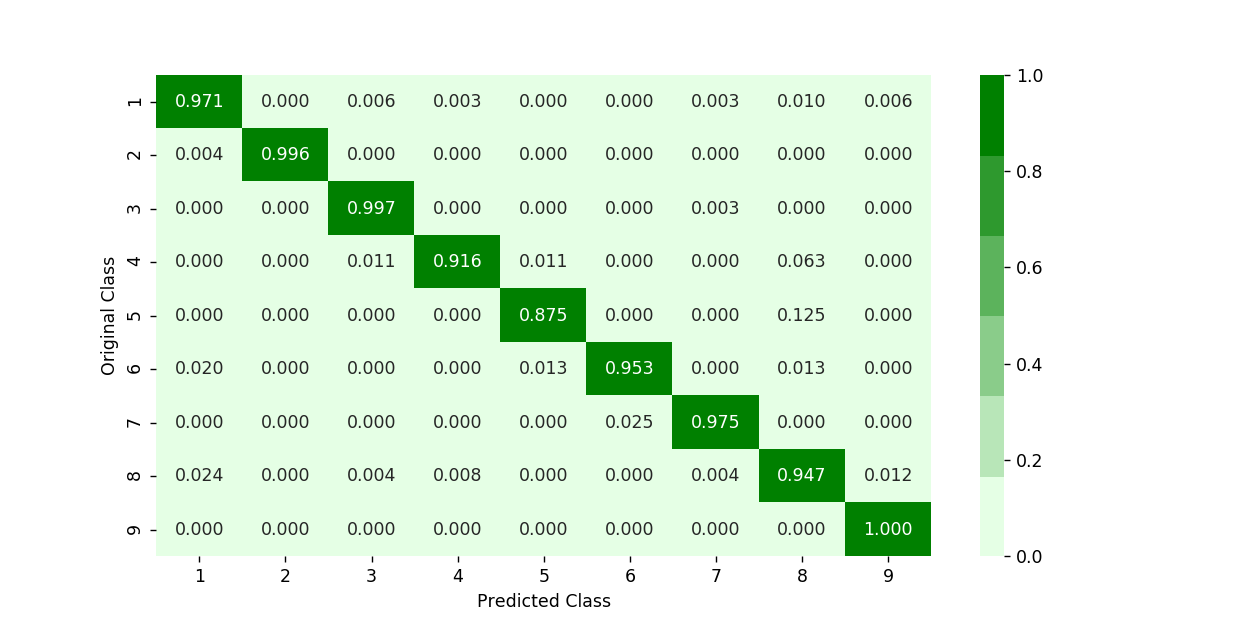

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [159]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# 
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    loss = log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15)
    cv_log_error_array.append()
    print ('log_loss for k = ',i,'is',loss)
for i in range(len(cv_log_error_array)):
    

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.58867274165
log_loss for c =  0.0001 is 1.54560797884
log_loss for c =  0.001 is 1.30137786807
log_loss for c =  0.01 is 1.33317456931
log_loss for c =  0.1 is 1.16705751378
log_loss for c =  1 is 0.757667807779
log_loss for c =  10 is 0.546533939819
log_loss for c =  100 is 0.438414998062
log_loss for c =  1000 is 0.424423536526


<IPython.core.display.Javascript object>


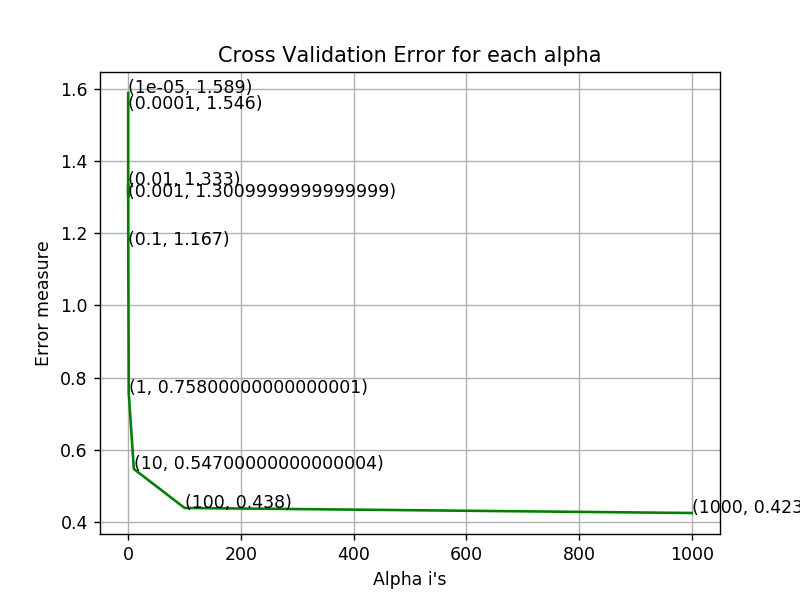

log loss for train data 0.396219394701
log loss for cv data 0.424423536526
log loss for test data 0.415685592517
Number of misclassified points  9.61361545538
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


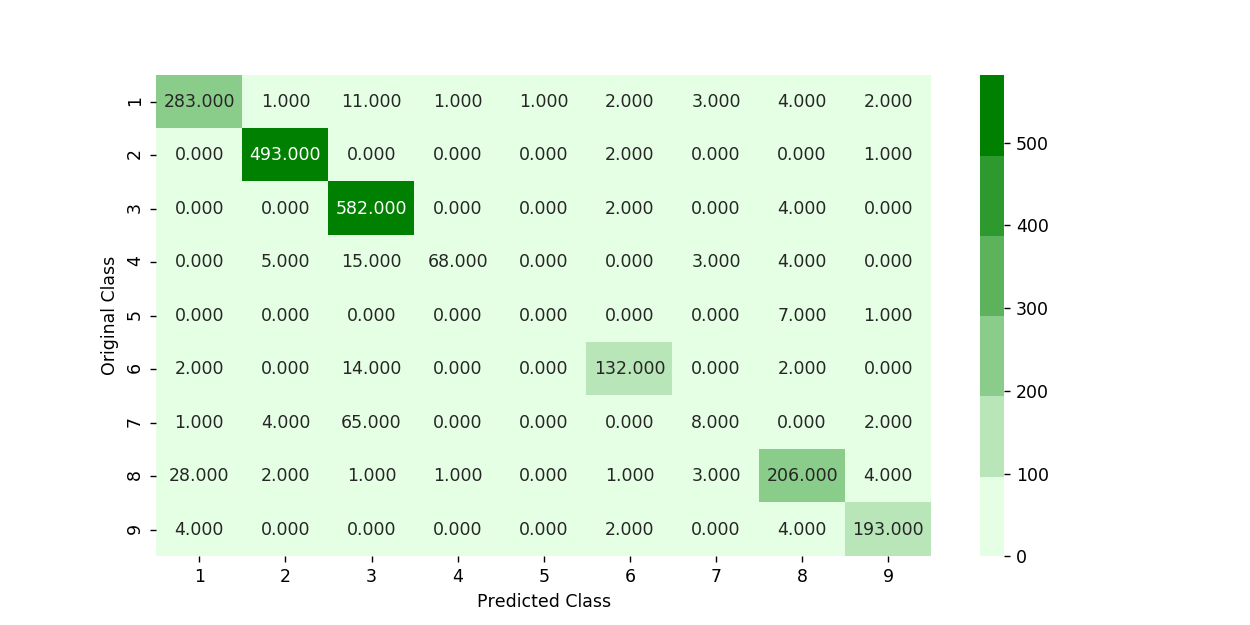

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


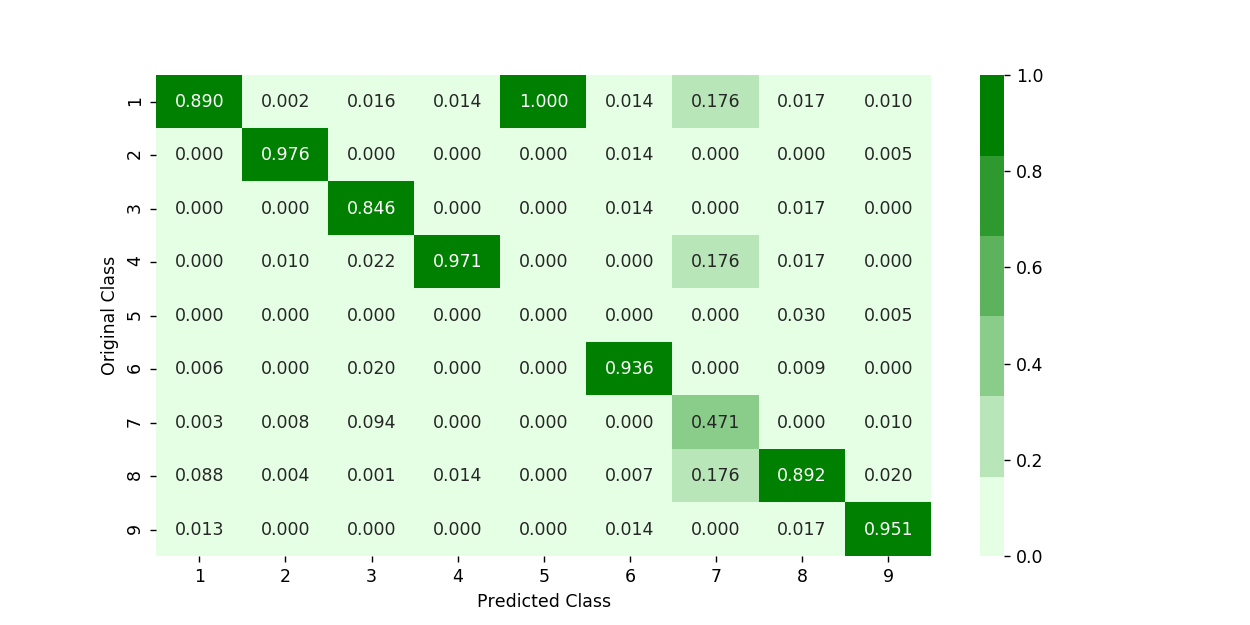

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


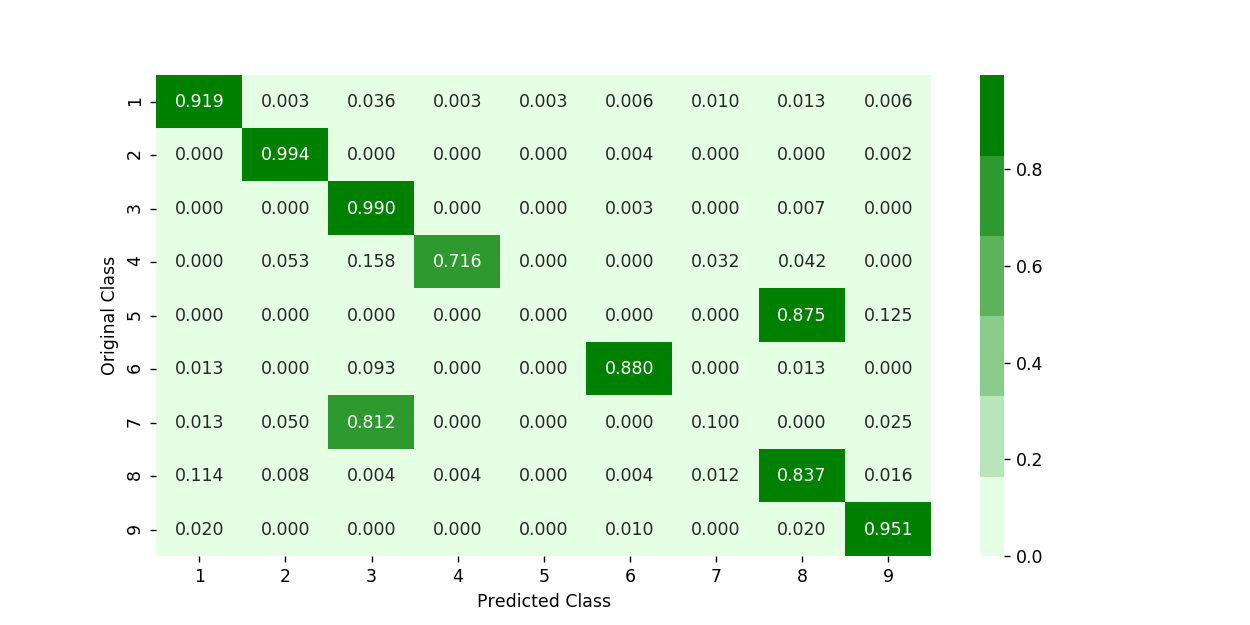

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [160]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------

#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.0581657906023
log_loss for c =  50 is 0.0515443148419
log_loss for c =  100 is 0.0513084973231
log_loss for c =  500 is 0.0499021761479
log_loss for c =  1000 is 0.0497972474298
log_loss for c =  2000 is 0.0497091690815
log_loss for c =  3000 is 0.0496706817633


<IPython.core.display.Javascript object>


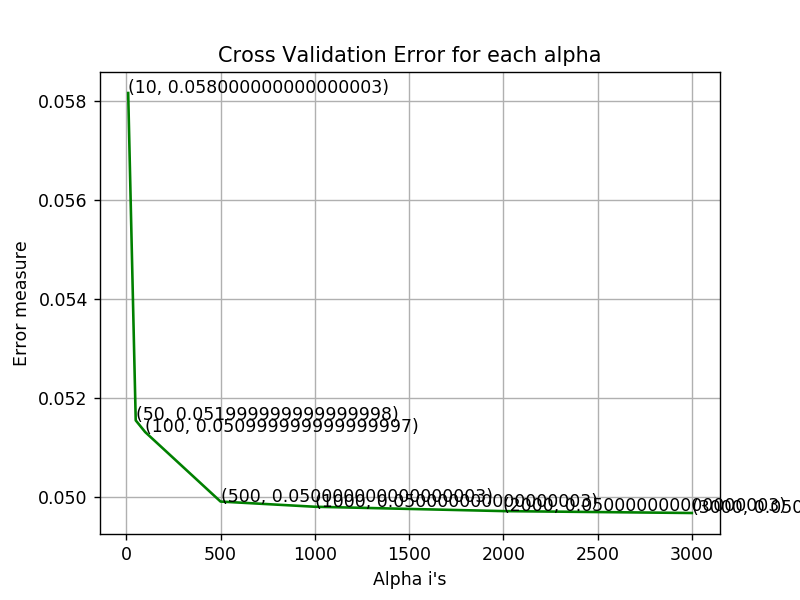

log loss for train data 0.0116517052676
log loss for cv data 0.0496706817633
log loss for test data 0.0571239496453
Number of misclassified points  1.14995400184
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


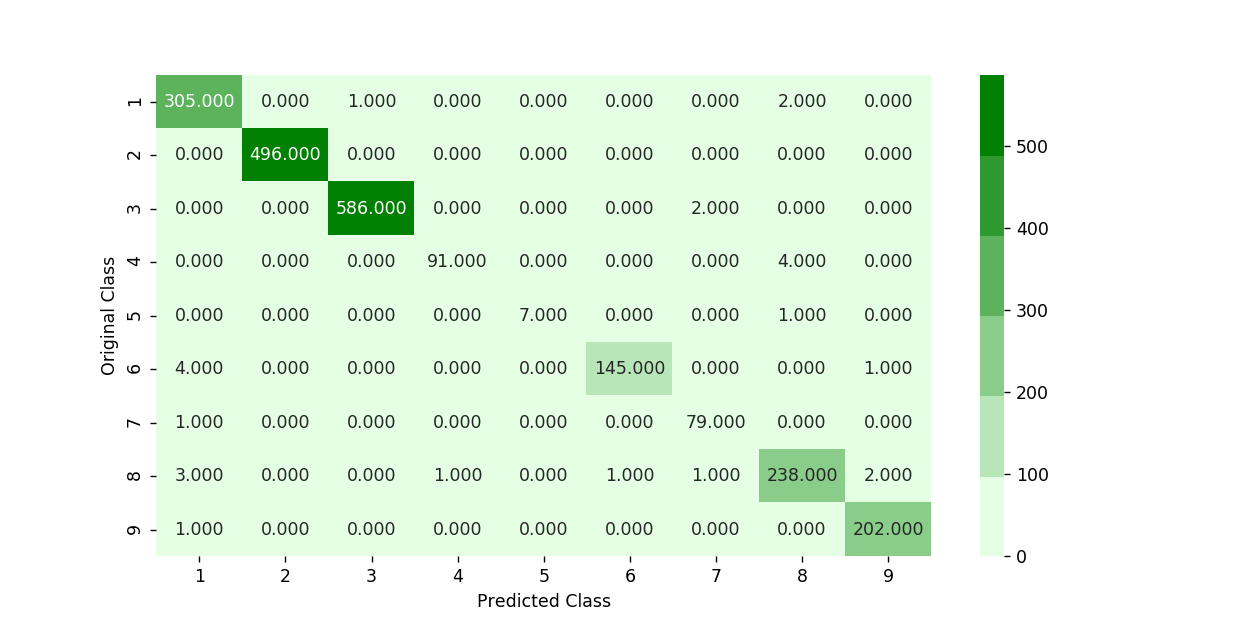

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


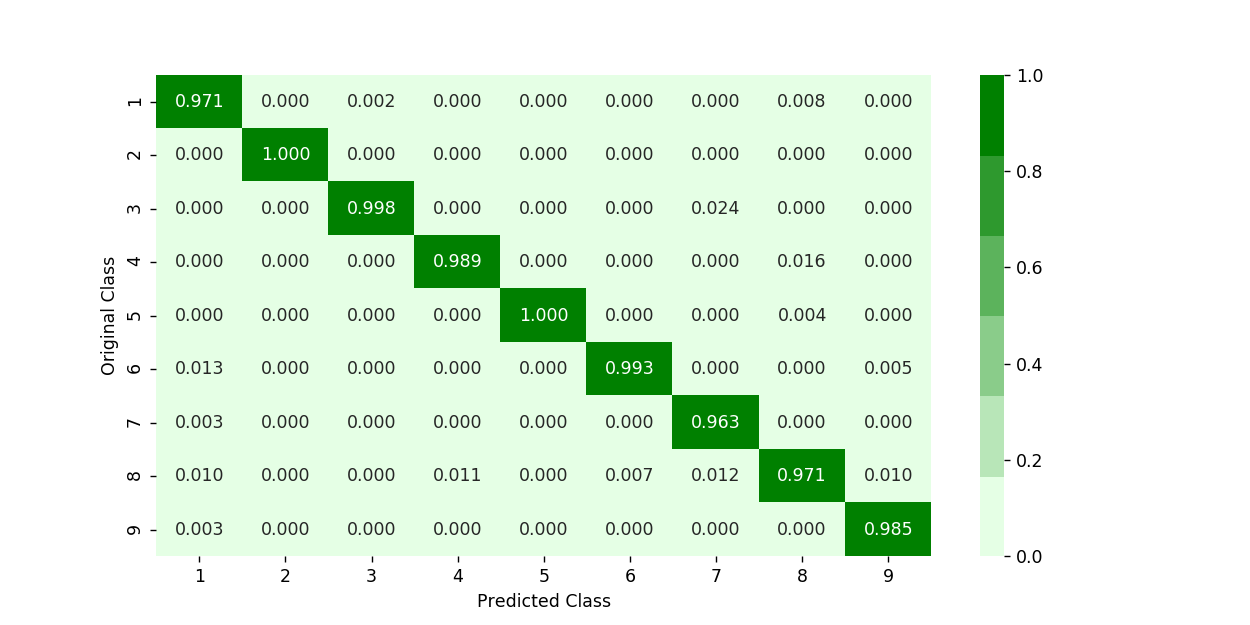

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


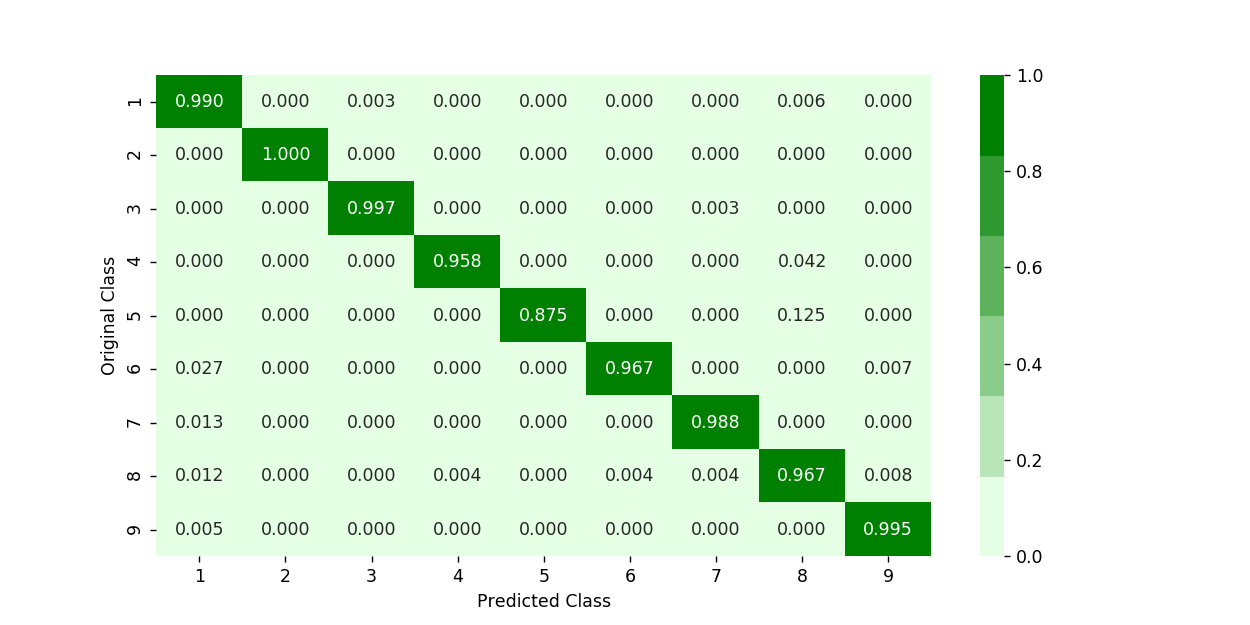

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [161]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------

# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

log_loss for c =  10 is 0.104344888454
log_loss for c =  50 is 0.0567190635611
log_loss for c =  100 is 0.056075038646
log_loss for c =  500 is 0.057336051683
log_loss for c =  1000 is 0.0571265109903
log_loss for c =  2000 is 0.057103406781
log_loss for c =  3000 is 0.0567993215778


<IPython.core.display.Javascript object>


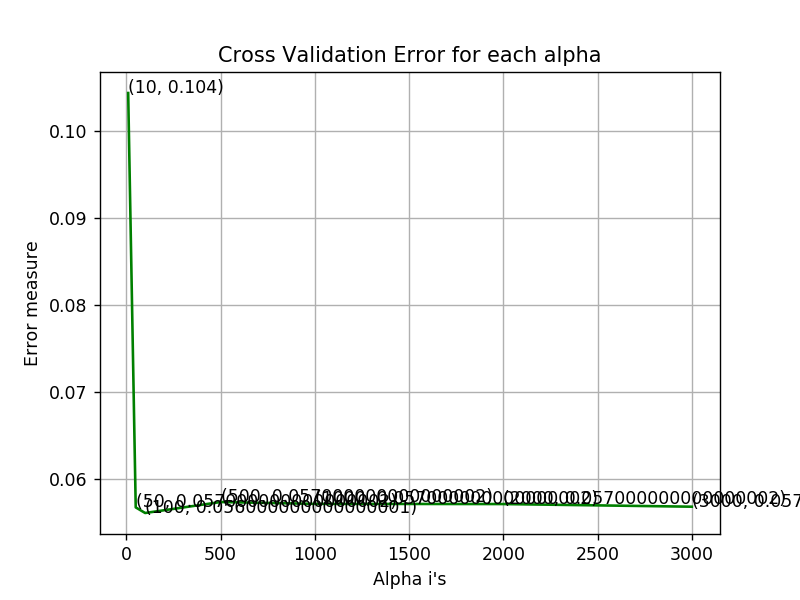

For values of best alpha =  100 The train log loss is: 0.0117883742574
For values of best alpha =  100 The cross validation log loss is: 0.056075038646
For values of best alpha =  100 The test log loss is: 0.0491647763845
Number of misclassified points  0.873965041398
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


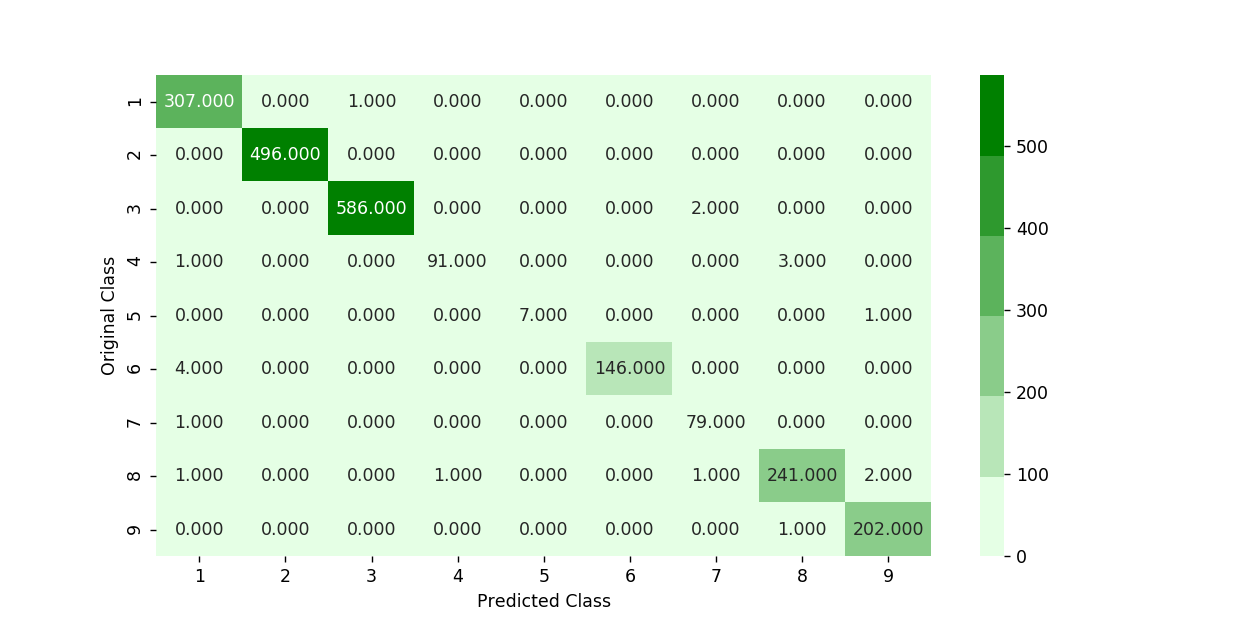

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


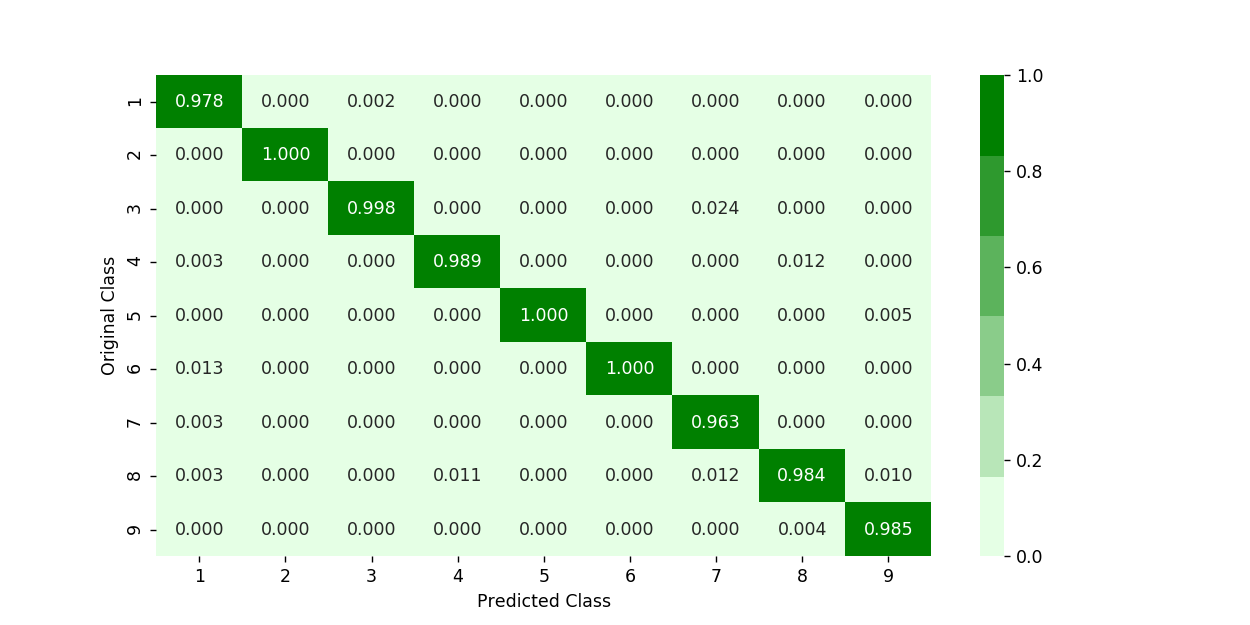

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


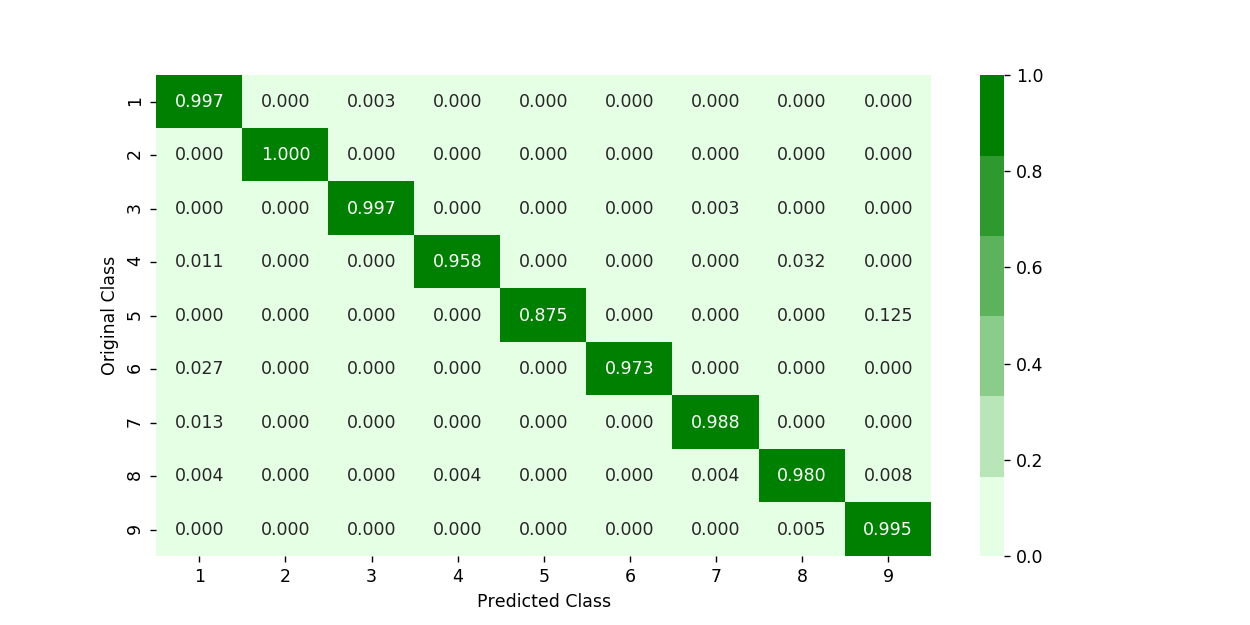

Sum of rows in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [162]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [163]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.1min remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.3min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.4min remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=10)

In [164]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [170]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------

# -----------------------

x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.0102661325822
cv loss 0.0501201796687
test loss 0.0483908764397


# 4.5 Machine Learning models on call graph features obtained from .asm file

In [20]:
result_call_graph = pd.read_csv("final_call_graph_features.csv")
result_call_graph.head() # dataframe containing byte features 

Unnamed: 0                    ID  vertex_count  edge_count  delta_max  \
0           0  8i6m0aVAwsdSY2FEfU59           115         100         33   
1           1  8IbD9QgPs01NR7STfAxH           222         307        126   
2           2  8iBGtATMYPI0cqpVC2d5          5285        5455        103   
3           3  8iDWJ4yKzNSAQjnxwO70           122         119          3   
4           4  8inLjyQfkReMHmNUE4qg           194         132         25   

    density  
0  0.201613  
1  0.097152  
2  0.006000  
3  0.138211  
4  0.053119

In [21]:
result_call_graph.drop(['Unnamed: 0'],axis = 1,inplace= True)
result_call_graph = pd.merge(result_call_graph,Y,on ='ID')
result_call_graph.head()

ID  vertex_count  edge_count  delta_max   density  Class
0  8i6m0aVAwsdSY2FEfU59           115         100         33  0.201613      1
1  8IbD9QgPs01NR7STfAxH           222         307        126  0.097152      2
2  8iBGtATMYPI0cqpVC2d5          5285        5455        103  0.006000      1
3  8iDWJ4yKzNSAQjnxwO70           122         119          3  0.138211      7
4  8inLjyQfkReMHmNUE4qg           194         132         25  0.053119      2

In [22]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
#result_byte_final_normalized = normalize(result_byte_final)

In [23]:
result_call_graph_normal = normalize(result_call_graph)

In [24]:
result_call_graph_normal.replace([np.inf, -np.inf], np.nan)

result_call_graph_normal.dropna(inplace=True,how='any')
result_call_graph_normal.shape
result_y = result_call_graph_normal['Class']

In [33]:
result_call_graph_normal.drop(['ID'],axis = 1,inplace=True)
result_call_graph_normal.shape

(10868, 5)

<h3>  Multivariate Analysis on final fearures</h3>

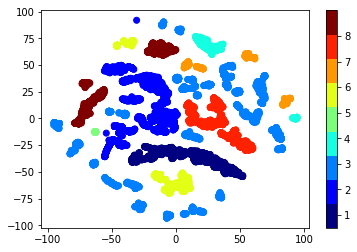

In [30]:

xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_call)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3>  Train and Test split</h3>

In [34]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_call_graph_normal, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3>  Random Forest Classifier on call graph features</h3>

log_loss for c =  10 is 0.007976730821609157
log_loss for c =  50 is 0.005509055179544572
log_loss for c =  100 is 0.005667811819101597
log_loss for c =  500 is 0.005624384020965916
log_loss for c =  1000 is 0.005641432752218938
log_loss for c =  2000 is 0.0056371213982916975
log_loss for c =  3000 is 0.005672622781241106


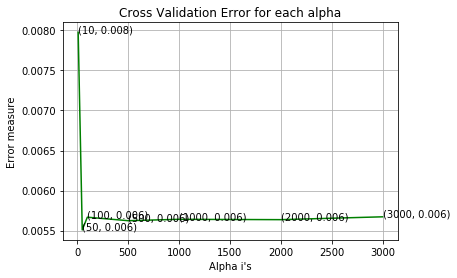

For values of best alpha =  50 The train log loss is: 0.005021987155798347
For values of best alpha =  50 The cross validation log loss is: 0.005509055179544572
For values of best alpha =  50 The test log loss is: 0.005644708767201059
Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


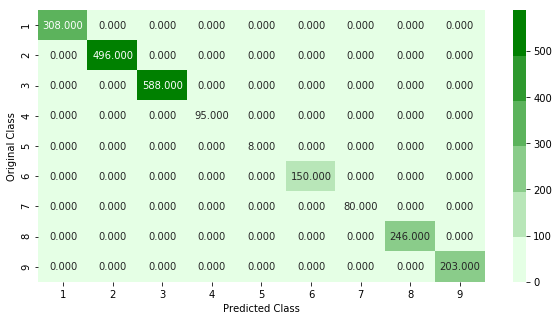

-------------------------------------------------- Precision matrix --------------------------------------------------


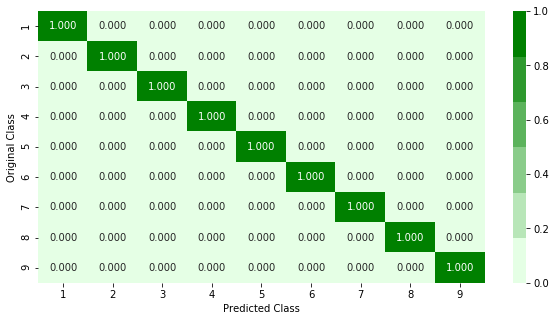

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


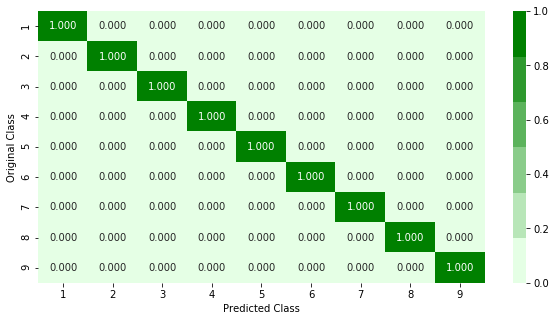

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    loss = log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print('log_loss for c = ',i,'is',loss)


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3> XgBoost Classifier on call graph features with best hyper parameters using Random search</h3>

In [38]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:  1.1min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.8min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  2.0min remaining:   35.7s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  2.0min remaining:   13.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [39]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


For values of best alpha =  50 The train log loss is: 0.003958234057842037
For values of best alpha =  50 The cross validation log loss is: 0.003976519137368871
For values of best alpha =  50 The test log loss is: 0.003988905405599336
Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


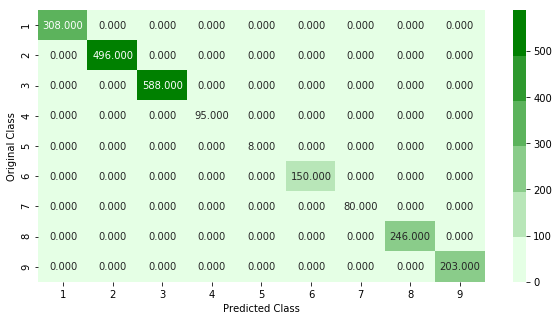

-------------------------------------------------- Precision matrix --------------------------------------------------


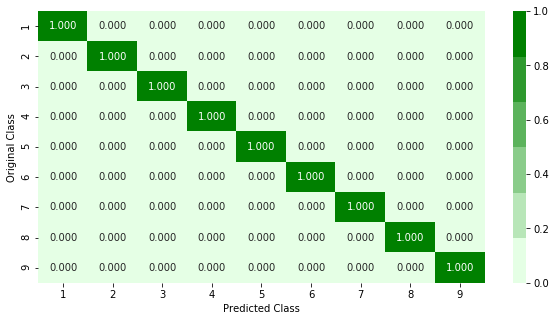

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


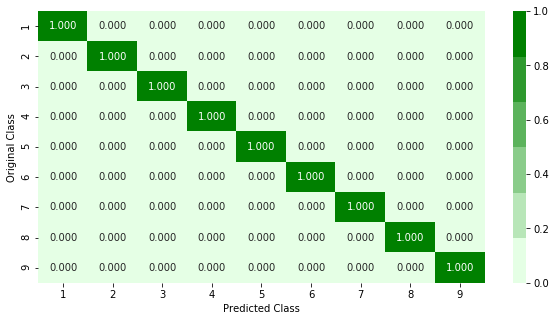

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------


x_cfl=XGBClassifier(n_estimators=random_cfl.best_params_['n_estimators'],max_depth=random_cfl.best_params_['max_depth'],
                    learning_rate=random_cfl.best_params_['learning_rate'],colsample_bytree=random_cfl.best_params_['colsample_bytree'],
                    subsample=random_cfl.best_params_['subsample'],n_jobs=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h2> 4.6. Machine Learning models on features of both .asm and .bytes files</h2>

## Merging both asm and byte file features</h3>

In [103]:
result_byte_final = pd.read_csv("result_byte_final.csv")
result_byte_final.head() # dataframe containing byte features 

Unnamed: 0                    ID       E8      0B        00      E9  \
0           0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0   
1           1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   
2           2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0   
3           3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   
4           4  01SuzwMJEIXsK7A8dQbl    546.0   226.0   19764.0   543.0   

       16      90      B9      25  ...  00F000  000030  048004  044604  \
0  3184.0  4578.0  3502.0  4002.0  ...    28.0  2018.0     0.0     0.0   
1   349.0   925.0   526.0   301.0  ...     0.0    14.0     0.0     0.0   
2  2408.0  2478.0  2658.0  2327.0  ...     2.0    36.0     2.0     2.0   
3   413.0   551.0   487.0   566.0  ...    10.0    26.0     0.0     0.0   
4   240.0   242.0   296.0   486.0  ...     4.0    10.0     0.0     0.0   

   008B00  008800  008D00  000064      size  Class  
0    30.0    12.0    18.0  2000.0  4.321289      9  
1    14.0     0.0     2.0    16.0  5.651855      2  
2    22.0     4.0     8.0    26.0  3.967285      9  
3    72.0    10.0    28.0   108.0  0.585938      1  
4     2.0     0.0     0.0     8.0  0.378418      8  

[5 rows x 661 columns]

In [8]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
#result_byte_final_normalized = normalize(result_byte_final)

In [104]:
result_asm = pd.read_csv('asmoutputfile.csv')
result_asm.head() # dataframe containing asm features

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  :dword  edx  esi  eax  ebx  ecx  edi  ebp  \
0      323        0       3  ...     137   18   66   15   43   83    0   17   
1        0        0       3  ...     130   18   29   48   82   12    0   14   
2      145        0       3  ...      84   13   42   10   67   14    0   11   
3        0        0       3  ...      25    6    8   14    7    2    0    8   
4        0        0       3  ...      18   12    9   18   29    5    0   11   

   esp  eip  
0   48   29  
1    0   20  
2    0    9  
3    0    6  
4    0   11  

[5 rows x 52 columns]

In [105]:
print(result_byte_final.shape)
print(result_asm.shape)

(10862, 661)
(10868, 52)


In [206]:
#merging the byte and asm features 
result_x = pd.merge(result_byte_final,result_asm, axis=1,on='ID', how='left')
#result_y = result_x['Class']
result_x = result_x.drop(['Unnamed: 0','ID','rtn','.BSS:','.CODE'], axis=1)


In [12]:
result_x.replace([np.inf, -np.inf], np.nan)

result_x.dropna(inplace=True,how='any')
result_x.shape
result_y = result_x['Class']

<h3>  Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


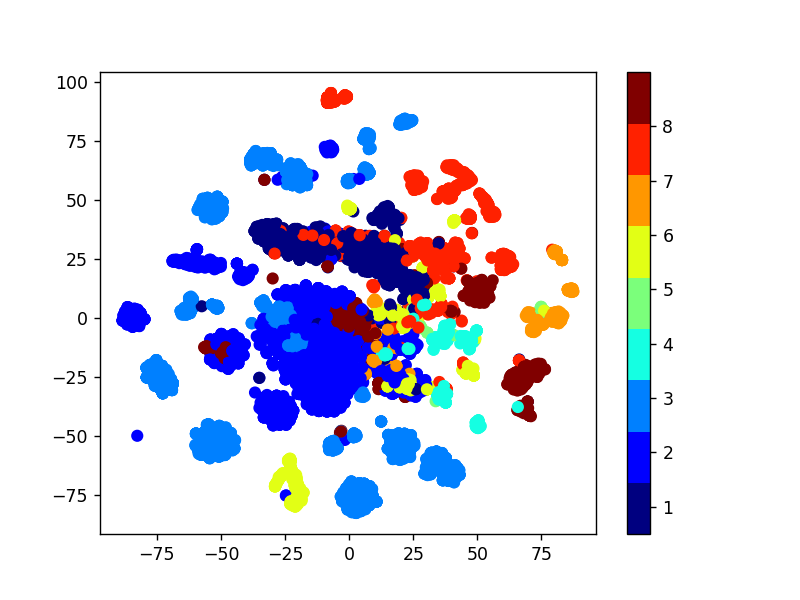

In [181]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x, axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3>  Train and Test split</h3>

In [13]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3>  Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.024630432837715748
log_loss for c =  50 is 0.018329922638091835
log_loss for c =  100 is 0.02020990473493168
log_loss for c =  500 is 0.02032819077720618
log_loss for c =  1000 is 0.020327701066057937
log_loss for c =  2000 is 0.020049945269992295
log_loss for c =  3000 is 0.020012478468403247


<IPython.core.display.Javascript object>


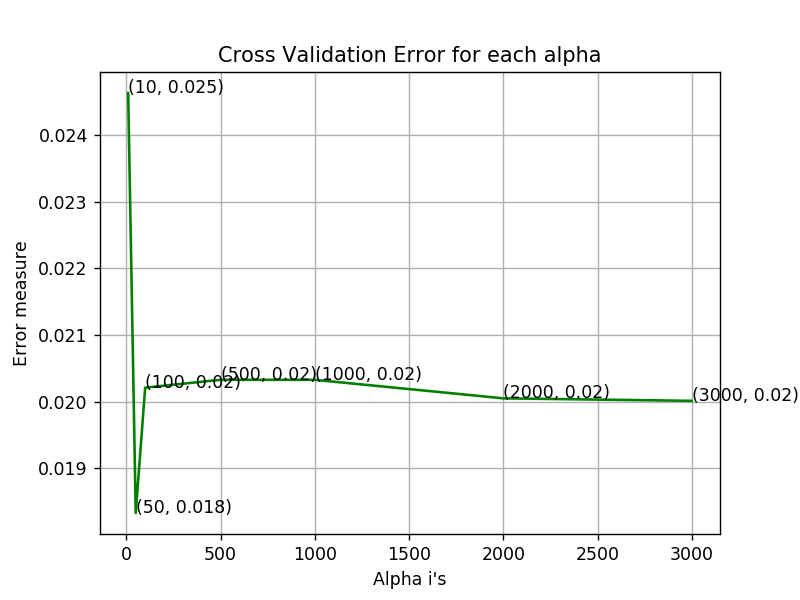

For values of best alpha =  50 The train log loss is: 0.011997553700114998
For values of best alpha =  50 The cross validation log loss is: 0.018329922638091835
For values of best alpha =  50 The test log loss is: 0.028559935635210264


In [81]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    loss = log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print('log_loss for c = ',i,'is',loss)


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3>  XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.02144036875600191
log_loss for c =  50 is 0.007092903728924226
log_loss for c =  100 is 0.00600241779548082
log_loss for c =  500 is 0.00584672727684514
log_loss for c =  1000 is 0.005846985335989776
log_loss for c =  2000 is 0.0058469950114759155
log_loss for c =  3000 is 0.005846842975236974


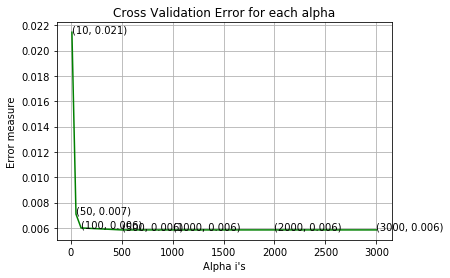

For values of best alpha =  500 The train log loss is: 0.004729456003412864
For values of best alpha =  500 The cross validation log loss is: 0.00584672727684514
For values of best alpha =  500 The test log loss is: 0.006376050168175821


In [14]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,random_state= 42,n_jobs=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    loss = log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print ('log_loss for c = ',i,'is',loss) 


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],n_jobs=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3> XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [15]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:  2.1min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  2.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  6.6min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  8.8min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 10.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.8min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [16]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


For values of best alpha =  500 The train log loss is: 0.005091474362977336
For values of best alpha =  500 The cross validation log loss is: 0.004899047087610139
For values of best alpha =  500 The test log loss is: 0.007103627929569182
Number of misclassified points  0.04714757190004715
-------------------------------------------------- Confusion matrix --------------------------------------------------


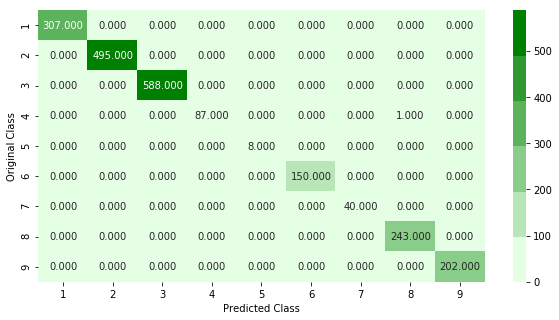

-------------------------------------------------- Precision matrix --------------------------------------------------


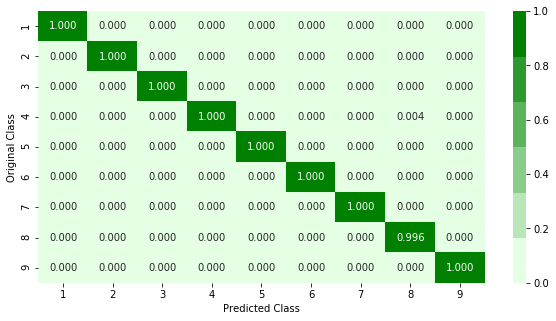

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


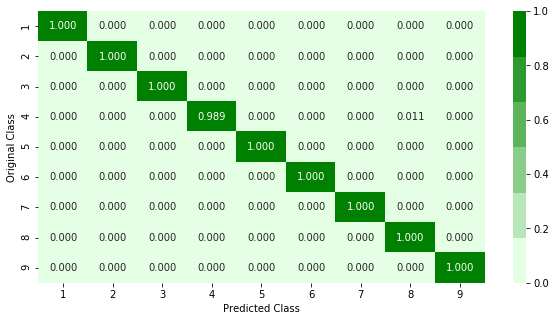

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------


x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.5,subsample=0.5,n_jobs=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

# 4.6 Improving the Log Loss by using Call graph features in addition to combined byte and asm features used earlier

In [9]:
#Reading the csv file have the call graph features into a dataframe.
call_graph_asm = pd.read_csv('final_call_graph_features.csv')
call_graph_asm.head()


Unnamed: 0                    ID  vertex_count  edge_count  delta_max  \
0           0  8i6m0aVAwsdSY2FEfU59           115         100         33   
1           1  8IbD9QgPs01NR7STfAxH           222         307        126   
2           2  8iBGtATMYPI0cqpVC2d5          5285        5455        103   
3           3  8iDWJ4yKzNSAQjnxwO70           122         119          3   
4           4  8inLjyQfkReMHmNUE4qg           194         132         25   

    density  
0  0.201613  
1  0.097152  
2  0.006000  
3  0.138211  
4  0.053119

In [14]:
call_graph_asm.drop(['Unnamed: 0'],axis=1,inplace=True)
call_graph_asm.head()

ID  vertex_count  edge_count  delta_max   density
0  8i6m0aVAwsdSY2FEfU59           115         100         33  0.201613
1  8IbD9QgPs01NR7STfAxH           222         307        126  0.097152
2  8iBGtATMYPI0cqpVC2d5          5285        5455        103  0.006000
3  8iDWJ4yKzNSAQjnxwO70           122         119          3  0.138211
4  8inLjyQfkReMHmNUE4qg           194         132         25  0.053119

In [15]:
#merging the call graph features to combined byte features
result_byte_final_byte_Fea_call_graph_byte = pd.merge(result_byte_final,call_graph_asm,on='ID',how='left')
result_byte_final_byte_Fea_call_graph_byte.head()

Unnamed: 0                    ID       E8      0B        00      E9  \
0           0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0   
1           1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   
2           2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0   
3           3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   
4           4  01SuzwMJEIXsK7A8dQbl    546.0   226.0   19764.0   543.0   

       16      90      B9      25  ...  008B00  008800  008D00  000064  \
0  3184.0  4578.0  3502.0  4002.0  ...    30.0    12.0    18.0  2000.0   
1   349.0   925.0   526.0   301.0  ...    14.0     0.0     2.0    16.0   
2  2408.0  2478.0  2658.0  2327.0  ...    22.0     4.0     8.0    26.0   
3   413.0   551.0   487.0   566.0  ...    72.0    10.0    28.0   108.0   
4   240.0   242.0   296.0   486.0  ...     2.0     0.0     0.0     8.0   

       size  Class  vertex_count  edge_count  delta_max   density  
0  4.321289      9           158        1533         95  0.140927  
1  5.651855      2           274         333        137  0.081319  
2  3.967285      9            26         126         35  0.600000  
3  0.585938      1            61          53         24  0.504762  
4  0.378418      8           187         196         82  0.181314  

[5 rows x 665 columns]

In [17]:
result_byte_final_byte_Fea_call_graph_byte.drop(["Unnamed: 0"],axis=1,inplace= True)
result_byte_final_byte_Fea_call_graph_byte.head()

ID       E8      0B        00      E9      16      90  \
0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0  3184.0  4578.0   
1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   349.0   925.0   
2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0  2408.0  2478.0   
3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   413.0   551.0   
4  01SuzwMJEIXsK7A8dQbl    546.0   226.0   19764.0   543.0   240.0   242.0   

       B9      25      2B  ...  008B00  008800  008D00  000064      size  \
0  3502.0  4002.0  3720.0  ...    30.0    12.0    18.0  2000.0  4.321289   
1   526.0   301.0   345.0  ...    14.0     0.0     2.0    16.0  5.651855   
2  2658.0  2327.0  2445.0  ...    22.0     4.0     8.0    26.0  3.967285   
3   487.0   566.0   399.0  ...    72.0    10.0    28.0   108.0  0.585938   
4   296.0   486.0   472.0  ...     2.0     0.0     0.0     8.0  0.378418   

   Class  vertex_count  edge_count  delta_max   density  
0      9           158        1533         95  0.140927  
1      2           274         333        137  0.081319  
2      9            26         126         35  0.600000  
3      1            61          53         24  0.504762  
4      8           187         196         82  0.181314  

[5 rows x 664 columns]

In [18]:
# merging with asm features with call graph and byte features
result_final = pd.merge(result_byte_final_byte_Fea_call_graph_byte,dfasm,on='ID',how='left')
result_final.head()

ID       E8      0B        00      E9      16      90  \
0  01azqd4InC7m9JpocGv5   4710.0  3546.0  601905.0  3034.0  3184.0  4578.0   
1  01IsoiSMh5gxyDYTl4CB   7506.0  6649.0   39755.0  6878.0   349.0   925.0   
2  01jsnpXSAlgw6aPeDxrU  22304.0  2669.0   93506.0  2514.0  2408.0  2478.0   
3  01kcPWA9K2BOxQeS5Rju   2899.0   445.0   21091.0   718.0   413.0   551.0   
4  01SuzwMJEIXsK7A8dQbl    546.0   226.0   19764.0   543.0   240.0   242.0   

       B9      25      2B  ...  :dword  edx   esi   eax   ebx  ecx  edi  ebp  \
0  3502.0  4002.0  3720.0  ...    4371  808  2290  1281   587  701    0   15   
1   526.0   301.0   345.0  ...    1446  260  1090   391   905  420    0   24   
2  2658.0  2327.0  2445.0  ...     903    5   547     5   451   56    0   27   
3   487.0   566.0   399.0  ...     137   18    66    15    43   83    0   17   
4   296.0   486.0   472.0  ...    1220   18  1228    24  1546  107    0   15   

   esp  eip  
0   14  456  
1   22  227  
2    0  117  
3   48   29  
4    0   76  

[5 rows x 715 columns]

In [3]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1


In [25]:
#normalizing 
result_final_normalized = normalize(result_final)
result_final_normalized.head()

ID        E8        0B        00        E9        16  \
0  01azqd4InC7m9JpocGv5  0.033101  0.001946  0.262786  0.041423  0.003776   
1  01IsoiSMh5gxyDYTl4CB  0.052818  0.003650  0.017332  0.093921  0.000413   
2  01jsnpXSAlgw6aPeDxrU  0.157169  0.001465  0.040801  0.034321  0.002855   
3  01kcPWA9K2BOxQeS5Rju  0.020330  0.000244  0.009182  0.009792  0.000489   
4  01SuzwMJEIXsK7A8dQbl  0.003737  0.000124  0.008603  0.007402  0.000283   

         90        B9        25        2B  ...    :dword       edx       esi  \
0  0.019713  0.014473  0.003825  0.007631  ...  0.032784  0.015418  0.025875   
1  0.003980  0.002170  0.000284  0.000706  ...  0.010846  0.004961  0.012316   
2  0.010668  0.010984  0.002223  0.005015  ...  0.006773  0.000095  0.006181   
3  0.002369  0.002009  0.000538  0.000817  ...  0.001028  0.000343  0.000746   
4  0.001038  0.001219  0.000461  0.000966  ...  0.009150  0.000343  0.013875   

        eax       ebx       ecx  edi       ebp       esp       eip  
0  0.025744  0.004910  0.008930  0.0  0.027174  0.000428  0.049896  
1  0.007858  0.007570  0.005350  0.0  0.043478  0.000673  0.024839  
2  0.000100  0.003773  0.000713  0.0  0.048913  0.000000  0.012802  
3  0.000301  0.000360  0.001057  0.0  0.030797  0.001468  0.003173  
4  0.000482  0.012932  0.001363  0.0  0.027174  0.000000  0.008316  

[5 rows x 715 columns]

In [26]:
#Dropping all the nan values
result_final_normalized.dropna(how = 'any')
result_final_normalized.shape

(10862, 715)

In [27]:
#Dropping all the infinite values which ,ay have resulted due to divide zero during normalization
result_final_normalized.replace([np.inf, -np.inf], np.nan)
result_final_normalized = result_final_normalized.drop(['ID','rtn','.BSS:','.CODE'], axis=1)
result_final_normalized.dropna(inplace=True,how='any')
result_final_normalized.shape

(10603, 711)

In [35]:
result_final_y.head()

0    9
1    2
2    9
3    1
4    8
Name: Class, dtype: int64

In [34]:
result_final_y = result_final_normalized['Class']
result_final_normalized.shape


(10603, 711)

In [36]:
#performing train, cross validation and test split
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_final_normalized, result_final_y,stratify=result_final_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.042203575724378314
log_loss for c =  50 is 0.035829912540880395
log_loss for c =  100 is 0.035058470930008405
log_loss for c =  500 is 0.03296815383111179
log_loss for c =  1000 is 0.032972284699428776
log_loss for c =  2000 is 0.032940852230352785
log_loss for c =  3000 is 0.03276638229740042


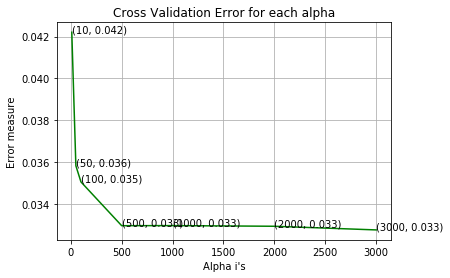

For values of best alpha =  3000 The train log loss is: 0.009335632931051982
For values of best alpha =  3000 The cross validation log loss is: 0.03276638229740042
For values of best alpha =  3000 The test log loss is: 0.036906147903308074


In [37]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    loss = log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print('log_loss for c = ',i,'is',loss)


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.027637398974818077
log_loss for c =  50 is 0.013845167895907989
log_loss for c =  100 is 0.011917938585116436
log_loss for c =  500 is 0.012636527374060532
log_loss for c =  1000 is 0.012635912348909204
log_loss for c =  2000 is 0.01263669535174256
log_loss for c =  3000 is 0.012636199818685002


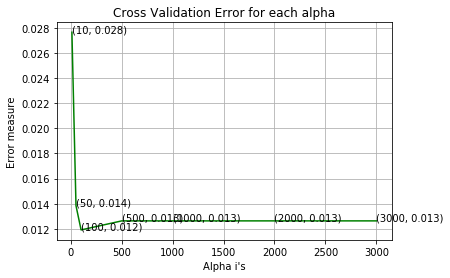

For values of best alpha =  100 The train log loss is: 0.004680278253141213
For values of best alpha =  100 The cross validation log loss is: 0.011917938585116436
For values of best alpha =  100 The test log loss is: 0.005546428308997941


In [38]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,random_state= 42,n_jobs=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    loss = log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print ('log_loss for c = ',i,'is',loss) 


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],n_jobs=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [39]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:  3.5min remaining:  6.1min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  4.7min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  6.1min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 11.4min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 12.0min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.3min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [40]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 1}


For values of best alpha =  500 The train log loss is: 0.005091474362977336
For values of best alpha =  500 The cross validation log loss is: 0.004899047087610139
For values of best alpha =  500 The test log loss is: 0.007103627929569182
Number of misclassified points  0.04714757190004715
-------------------------------------------------- Confusion matrix --------------------------------------------------


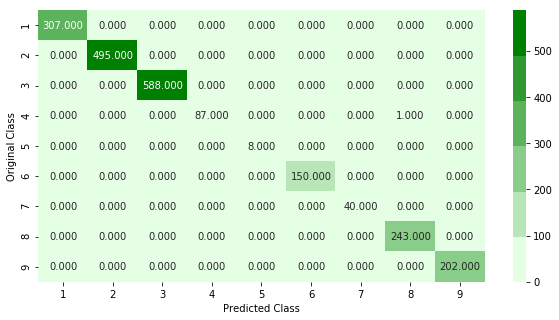

-------------------------------------------------- Precision matrix --------------------------------------------------


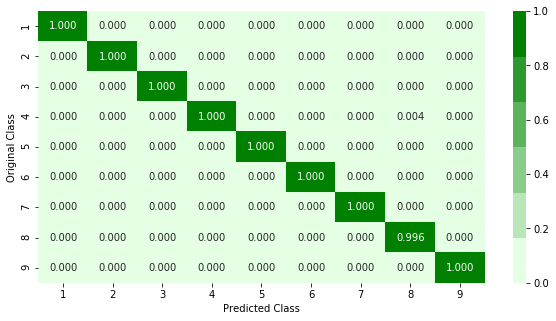

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


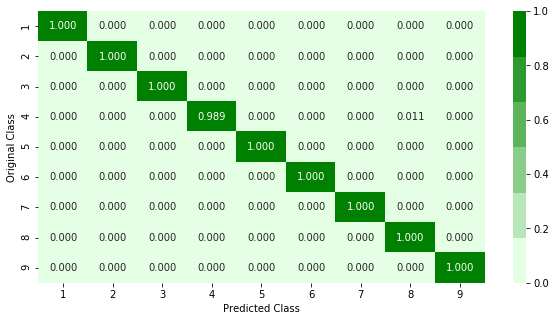

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.,colsample_bytree=0.5,subsample=0.5,n_jobs=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

# Image Features

In [197]:
df_image_features = pd.read_csv("Image_features.csv")
df_image_features.head()

Unnamed: 0  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0           0       72       69       65       68       69       82       58   
1           1       46      122      101      110       99       58       48   
2           2       72       69       65       68       69       82       58   
3           3       72       69       65       68       69       82       58   
4           4       46      116      101      120      116       58       48   

   pixel_7  pixel_8  ...  pixel_790  pixel_791  pixel_792  pixel_793  \
0       49       48  ...         61         61         61         61   
1       48       52  ...         97        108         32         97   
2       49       48  ...        109        111        100        101   
3       48       48  ...         61         61         61         61   
4       48       52  ...         56         54         32         40   

   pixel_794  pixel_795  pixel_796  pixel_797  pixel_798  pixel_799  
0         61         61         61         61         61         61  
1        100        100        114        101        115        115  
2        108         32        102        108         97        116  
3         61         61         61         61         61         61  
4         80         69         41         13         10         46  

[5 rows x 801 columns]

In [198]:
df_image_features.drop(["Unnamed: 0"],axis=1,inplace=True)
print(df_image_features.shape)


(10868, 800)


In [200]:
df_image_features['ID'] = Y['ID']
df_image_features['Class'] = Y['Class']
df_image_features.head()

pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0       72       69       65       68       69       82       58       49   
1       46      122      101      110       99       58       48       48   
2       72       69       65       68       69       82       58       49   
3       72       69       65       68       69       82       58       48   
4       46      116      101      120      116       58       48       48   

   pixel_8  pixel_9  ...  pixel_792  pixel_793  pixel_794  pixel_795  \
0       48       48  ...         61         61         61         61   
1       52       48  ...         32         97        100        100   
2       48       48  ...        100        101        108         32   
3       48       52  ...         61         61         61         61   
4       52       48  ...         32         40         80         69   

   pixel_796  pixel_797  pixel_798  pixel_799                    ID  Class  
0         61         61         61         61  01kcPWA9K2BOxQeS5Rju      1  
1        114        101        115        115  04EjIdbPV5e1XroFOpiN      1  
2        102        108         97        116  05EeG39MTRrI6VY21DPd      1  
3         61         61         61         61  05rJTUWYAKNegBk2wE8X      1  
4         41         13         10         46  0AnoOZDNbPXIr2MRBSCJ      1  

[5 rows x 802 columns]

In [201]:
df_image_features_normalized = normalize(df_image_features)
df_image_features_normalized.head()


pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5  pixel_6  \
0  0.481928  0.302632  0.000000  0.277778  0.291667  0.500000      1.0   
1  0.168675  1.000000  0.705882  0.861111  0.708333  0.147059      0.0   
2  0.481928  0.302632  0.000000  0.277778  0.291667  0.500000      1.0   
3  0.481928  0.302632  0.000000  0.277778  0.291667  0.500000      1.0   
4  0.168675  0.921053  0.705882  1.000000  0.944444  0.147059      0.0   

    pixel_7   pixel_8   pixel_9  ...  pixel_792  pixel_793  pixel_794  \
0  0.058824  0.000000  0.000000  ...   0.481481   0.490566   0.525253   
1  0.000000  0.181818  0.000000  ...   0.212963   0.830189   0.919192   
2  0.058824  0.000000  0.000000  ...   0.842593   0.867925   1.000000   
3  0.000000  0.000000  0.181818  ...   0.481481   0.490566   0.525253   
4  0.000000  0.181818  0.000000  ...   0.212963   0.292453   0.717172   

   pixel_795  pixel_796  pixel_797  pixel_798  pixel_799  \
0   0.490566   0.490566   0.485981   0.460177   0.485981   
1   0.858491   0.990566   0.859813   0.938053   0.990654   
2   0.216981   0.877358   0.925234   0.778761   1.000000   
3   0.490566   0.490566   0.485981   0.460177   0.485981   
4   0.566038   0.301887   0.037383   0.008850   0.345794   

                     ID  Class  
0  01kcPWA9K2BOxQeS5Rju      1  
1  04EjIdbPV5e1XroFOpiN      1  
2  05EeG39MTRrI6VY21DPd      1  
3  05rJTUWYAKNegBk2wE8X      1  
4  0AnoOZDNbPXIr2MRBSCJ      1  

[5 rows x 802 columns]

In [202]:
df_image_features_normalized.replace([np.inf], np.nan)
df_image_features_normalized.dropna(how='any',axis=1,inplace=True)
df_image_features_normalized.shape

(10868, 800)

In [203]:
y_image_feat = df_image_features_normalized['Class']
df_image_features_normalized.drop(['ID'],axis=1,inplace=True)
df_image_features_normalized.shape

(10868, 799)

In [204]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(df_image_features_normalized, y_image_feat,stratify=y_image_feat,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on Image features</h3>

log_loss for c =  10 is 0.19516926284670316
log_loss for c =  50 is 0.18763343800967439
log_loss for c =  100 is 0.18318801834098444
log_loss for c =  500 is 0.18611121486569585
log_loss for c =  1000 is 0.18648396203981923
log_loss for c =  2000 is 0.18548087736306942
log_loss for c =  3000 is 0.1858611829147577


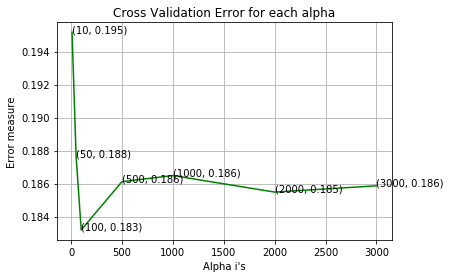

For values of best alpha =  100 The train log loss is: 0.06337428300424243
For values of best alpha =  100 The cross validation log loss is: 0.18318801834098444
For values of best alpha =  100 The test log loss is: 0.15368633248918703
Number of misclassified points  4.04783808647654
-------------------------------------------------- Confusion matrix --------------------------------------------------


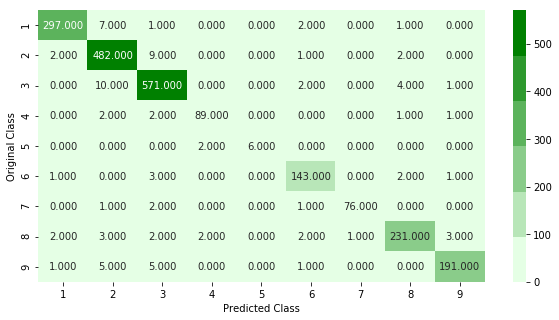

-------------------------------------------------- Precision matrix --------------------------------------------------


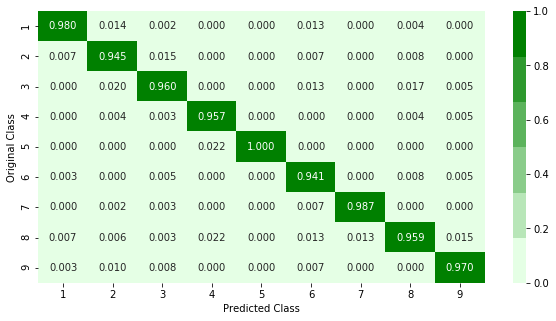

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


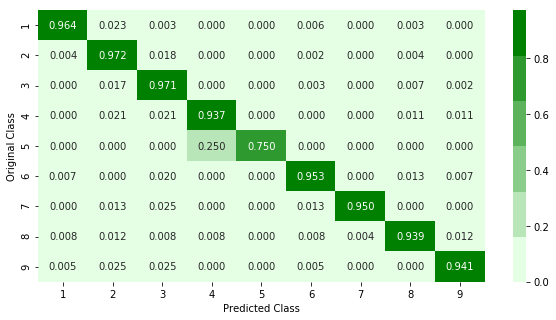

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [205]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    loss = log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print('log_loss for c = ',i,'is',loss)


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3> 4.5.5. XgBoost Classifier on ASM Image features with best hyper parameters using Random search</h3>

In [100]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed: 10.3min remaining: 17.7min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed: 11.3min remaining: 11.3min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 17.7min remaining: 10.3min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 18.5min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 22.3min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 26.9min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [101]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1}


For values of best alpha =  100 The train log loss is: 0.003885370842148645
For values of best alpha =  100 The cross validation log loss is: 0.003885537004226813
For values of best alpha =  100 The test log loss is: 0.0038853570865068055
Number of misclassified points  0.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


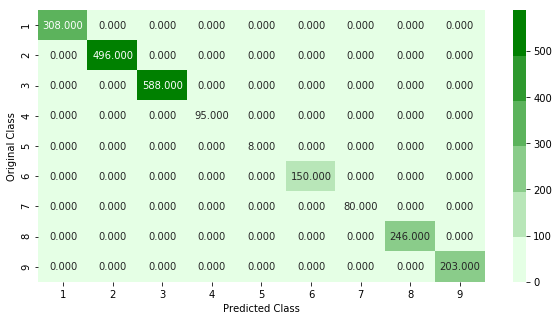

-------------------------------------------------- Precision matrix --------------------------------------------------


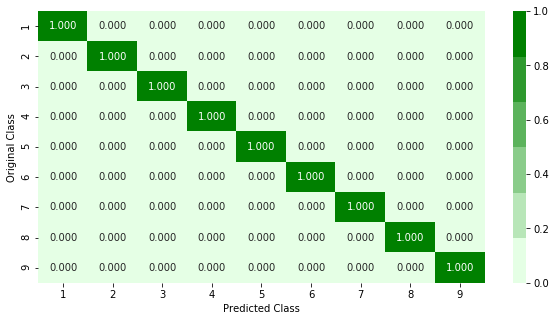

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


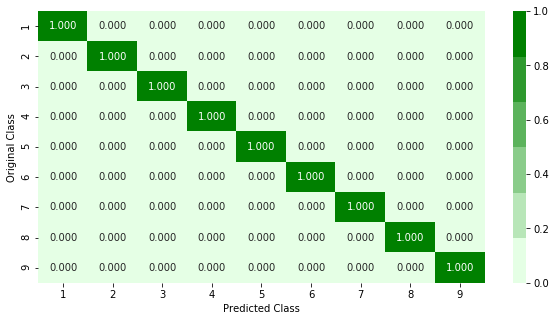

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [113]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------


x_cfl=XGBClassifier(n_estimators=2000,max_depth=10,learning_rate=0.2,colsample_bytree=1,subsample=1,n_jobs=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

# Final Model With Unigram, Bigram,N-gram features of Byte file, Call graph features of ASM file and Image Features of ASM file

In [78]:
df_byte = pd.read_csv('result_byte_final.csv')
df_call =pd.read_csv('final_call_graph_features.csv')
df_image = pd.read_csv('Image_features.csv')
df_image['ID'] = Y['ID']

In [80]:
df_final = pd.merge(df_byte,df_call,on='ID')
df_final = pd.merge(df_final,df_image,on='ID')
df_final.shape

(10862, 1467)

In [123]:
df_normalized = normalize(df_final)

In [132]:
df_normalized.replace([np.inf, -np.inf],np.nan,inplace=True)
df_normalized.drop(['ID','Class'],axis = 1).dropna(how='any',inplace=True)
df_normalized.shape

(10862, 1467)

In [150]:
df_ = np.nan_to_num(df_normalized.drop(['ID','Class'],axis =1),copy= False)

In [151]:
y_class = df_normalized['Class']
#df_normalized.drop(['ID','Class'],axis = 1,inplace = True)

In [152]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(df_, y_class,stratify=y_class,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.045904640292778354
log_loss for c =  50 is 0.036046076405505695
log_loss for c =  100 is 0.03438576523877995
log_loss for c =  500 is 0.03289431736449906
log_loss for c =  1000 is 0.03289767285147134
log_loss for c =  2000 is 0.032953043680867065
log_loss for c =  3000 is 0.03277101076965345


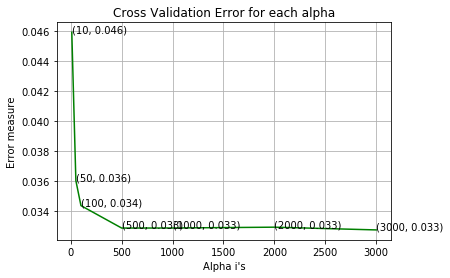

For values of best alpha =  3000 The train log loss is: 0.015469235354418928
For values of best alpha =  3000 The cross validation log loss is: 0.03277101076965345
For values of best alpha =  3000 The test log loss is: 0.04581987812939521
Number of misclassified points  1.1044638748274276
-------------------------------------------------- Confusion matrix --------------------------------------------------


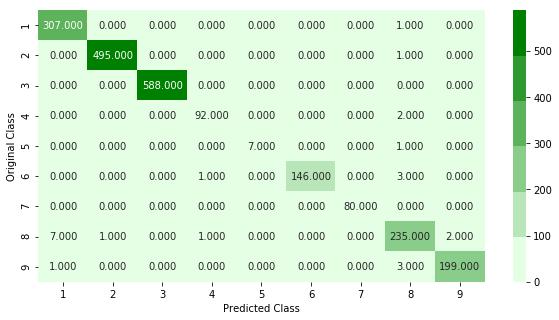

-------------------------------------------------- Precision matrix --------------------------------------------------


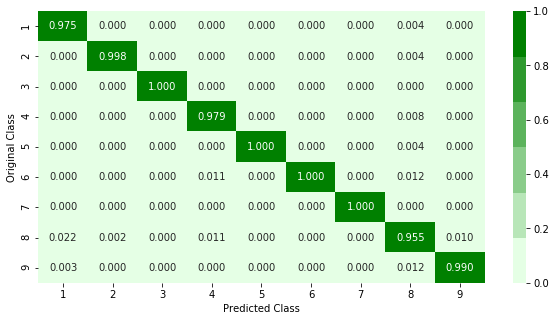

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


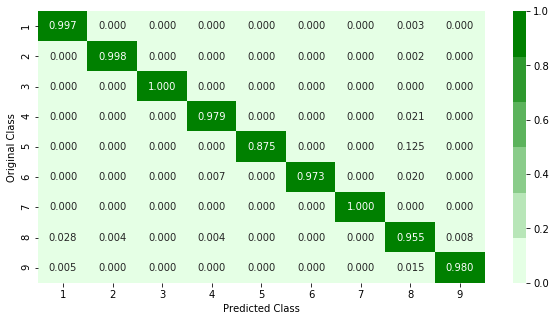

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [153]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    loss = log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15)
    cv_log_error_array.append(loss)
    print('log_loss for c = ',i,'is',loss)


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3> 4.5.5. XgBoost Classifier on Unigram,bigram and N-gram features of byte files and call graph ,Image features of  ASM file with best hyper parameters using Random search</h3>

In [154]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed: 51.0min remaining: 88.1min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed: 54.1min remaining: 54.1min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 60.8min remaining: 35.2min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 61.8min remaining: 18.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 62.1min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 66.7min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2], 'n_estimators': [100, 200, 500, 1000, 2000], 'max_depth': [3, 5, 10], 'colsample_bytree': [0.1, 0.3, 0.5, 1], 'subsample': [0.1, 0.3, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=10)

In [155]:
print (random_cfl.best_params_)

{'subsample': 0.3, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 1}


For values of best alpha =  3000 The train log loss is: 0.01290629242221789
For values of best alpha =  3000 The cross validation log loss is: 0.023220146974251066
For values of best alpha =  3000 The test log loss is: 0.03969101773948384
Number of misclassified points  0.7823285780027611
-------------------------------------------------- Confusion matrix --------------------------------------------------


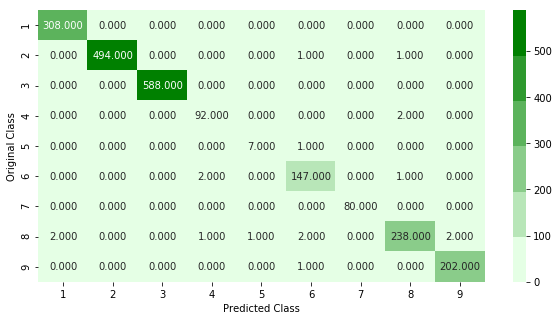

-------------------------------------------------- Precision matrix --------------------------------------------------


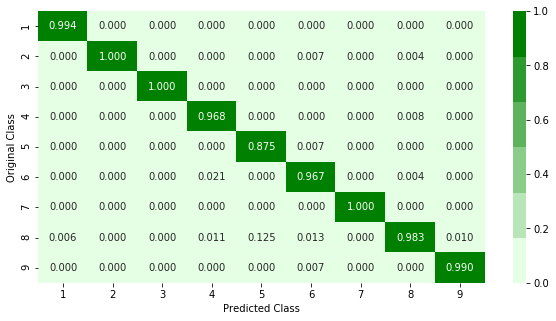

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


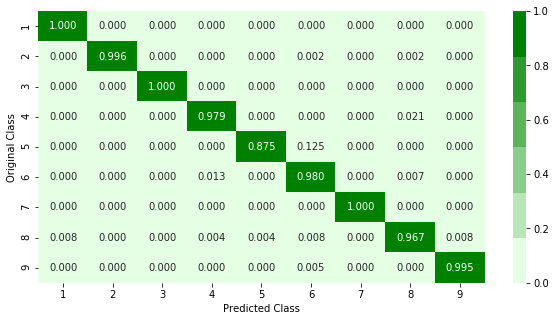

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [156]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------

x_cfl=XGBClassifier(n_estimators=random_cfl.best_params_['n_estimators'],max_depth=random_cfl.best_params_['max_depth'],
                    learning_rate=random_cfl.best_params_['learning_rate'],colsample_bytree=random_cfl.best_params_['colsample_bytree'],
                    subsample=random_cfl.best_params_['subsample'],n_jobs=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

In [2]:
print("Log loss for different models using Byte features")
table = PrettyTable()
table.field_names= ['Model','log loss']
table.add_row(['Random Model', 2.510])
table.add_row(['K- NN', 0.004])
table.add_row(['Logistic Regression', 0.071])
table.add_row(['Random Forest classifier', 0.028])
table.add_row(['XgBoost Classifier', 0.008])
print(table,'\n')
print("Log loss for different models using .ASM features")
table1 = PrettyTable()
table1.field_names= ['Model','log loss']
table1.add_row(['K- NN', 0.089])
table1.add_row(['Logistic Regression',  0.415])
table1.add_row(['Random Forest classifier', 0.057])
table1.add_row(['XgBoost Classifier', 0.048])
print(table1,'\n')
print("Log loss for Random forest and XgBoost classifier for call graph features obtained from .ASM features")
table2 = PrettyTable()
table2.field_names= ['Model','log loss']
table2.add_row(['Random Forest classifier', 0.005])
table2.add_row(['XgBoost Classifier', 0.003])
print(table2,'\n')
print("Log loss for Random forest and XgBoost classifier for byte and asm features together")
table3 = PrettyTable()
table3.field_names= ['Model','log loss']
table3.add_row(['Random Forest classifier', 0.028])
table3.add_row(['XgBoost Classifier', 0.007])
print(table3,'\n')
print("Log loss for Random forest and XgBoost classifier for byte and asm features together")
table4 = PrettyTable()
table4.field_names= ['Model','log loss']
table4.add_row(['Random Forest classifier', 0.036])
table4.add_row(['XgBoost Classifier', 0.007])
print(table4,'\n')
print("Log loss for Random forest and XgBoost classifier on Image feature obtained from .ASM file")
table5 = PrettyTable()
table5.field_names= ['Model','log loss']
table5.add_row(['Random Forest classifier', 0.153])
table5.add_row(['XgBoost Classifier', 0.003])
print(table5,'\n')
print("Log loss for Random forest and XgBoost classifier on byte (unigram,bi-gram,n-gram), .asm features, call graph and Image Features")
table6 = PrettyTable()
table6.field_names= ['Model','log loss']
table6.add_row(['Random Forest classifier', 0.045])
table6.add_row(['XgBoost Classifier', 0.039])
print(table6)

Log loss for different models using Byte features
+--------------------------+----------+
|          Model           | log loss |
+--------------------------+----------+
|       Random Model       |   2.51   |
|          K- NN           |  0.004   |
|   Logistic Regression    |  0.071   |
| Random Forest classifier |  0.028   |
|    XgBoost Classifier    |  0.008   |
+--------------------------+----------+ 

Log loss for different models using .ASM features
+--------------------------+----------+
|          Model           | log loss |
+--------------------------+----------+
|          K- NN           |  0.089   |
|   Logistic Regression    |  0.415   |
| Random Forest classifier |  0.057   |
|    XgBoost Classifier    |  0.048   |
+--------------------------+----------+ 

Log loss for Random forest and XgBoost classifier for call graph features obtained from .ASM features
+--------------------------+----------+
|          Model           | log loss |
+--------------------------+------

# Conclusion:

- XgBoost classifier performs the best as compared to other models.
- From the above table its clear that with call graph and Image features extracted from .ASM file gives the best log loss for XgBoost classifier.

# END